In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import sys
sys.path.append("/workspace/notebooks/")
sys.path.append("/workspace/notebooks/FSS/")
import torch
import numpy as np
import matplotlib.pyplot as plt

# ResNet18 on Cifar10 Test

In [2]:
from resnet import ResNetForCifar10,BasicBlock
model = ResNetForCifar10(BasicBlock, [2, 2, 2, 2], num_classes=10)

In [3]:
# cifar10
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomGrayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform_test = transforms.Compose([     
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_path = "/workspace/dataset/cifar10"
train_data = datasets.CIFAR10(root=data_path, train=True,transform=transform_train,download=False)
test_data =datasets.CIFAR10(root=data_path, train=False,transform=transform_test,download=False)

In [14]:
# training 
#数据分批
from torch import nn
from train_utils import train,test,display_loss_plot
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import numpy as np

num_epochs = 100
batch_size=200
data_loader_train = DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True,num_workers=2)
data_loader_test = DataLoader(dataset=test_data,batch_size=batch_size,shuffle=True,num_workers=2)

model = model.cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(),lr=1.0)
# lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=1)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,[60,80,90,95],gamma=0.1)

running_loss = []
running_test_acc = []

for epoch in range(num_epochs):
    loss_epoch = train(model, data_loader_train, optimizer, criterion,num_epochs,epoch)
    test_acc = test(model, data_loader_test)
    print("Epoch %d/%d: lr=%.4f, Training loss = %f, test accuracy = %f" % (
        epoch+1,num_epochs, optimizer.state_dict()['param_groups'][0]['lr'], 
        np.mean(loss_epoch), test_acc))
    running_loss.append(loss_epoch)
    running_test_acc.append(test_acc)
    lr_scheduler.step()

Training epoch 1/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/100: lr=1.0000, Training loss = 0.867427, test accuracy = 0.681700


Training epoch 2/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2/100: lr=1.0000, Training loss = 0.751694, test accuracy = 0.706600


Training epoch 3/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/100: lr=1.0000, Training loss = 0.667377, test accuracy = 0.728100


Training epoch 4/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4/100: lr=1.0000, Training loss = 0.587054, test accuracy = 0.735300


Training epoch 5/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 5/100: lr=1.0000, Training loss = 0.516230, test accuracy = 0.760100


Training epoch 6/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 6/100: lr=1.0000, Training loss = 0.450907, test accuracy = 0.776700


Training epoch 7/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 7/100: lr=1.0000, Training loss = 0.401801, test accuracy = 0.759000


Training epoch 8/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 8/100: lr=1.0000, Training loss = 0.346904, test accuracy = 0.764800


Training epoch 9/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 9/100: lr=1.0000, Training loss = 0.302841, test accuracy = 0.773400


Training epoch 10/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 10/100: lr=1.0000, Training loss = 0.262541, test accuracy = 0.779900


Training epoch 11/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 11/100: lr=1.0000, Training loss = 0.235388, test accuracy = 0.774700


Training epoch 12/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 12/100: lr=1.0000, Training loss = 0.203101, test accuracy = 0.773000


Training epoch 13/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 13/100: lr=1.0000, Training loss = 0.178123, test accuracy = 0.782700


Training epoch 14/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 14/100: lr=1.0000, Training loss = 0.159622, test accuracy = 0.781400


Training epoch 15/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 15/100: lr=1.0000, Training loss = 0.171245, test accuracy = 0.794900


Training epoch 16/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 16/100: lr=1.0000, Training loss = 0.124024, test accuracy = 0.789000


Training epoch 17/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 17/100: lr=1.0000, Training loss = 0.112267, test accuracy = 0.788200


Training epoch 18/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 18/100: lr=1.0000, Training loss = 0.098110, test accuracy = 0.800200


Training epoch 19/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 19/100: lr=1.0000, Training loss = 0.087816, test accuracy = 0.801400


Training epoch 20/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 20/100: lr=1.0000, Training loss = 0.077469, test accuracy = 0.791500


Training epoch 21/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 21/100: lr=1.0000, Training loss = 0.071346, test accuracy = 0.799600


Training epoch 22/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 22/100: lr=1.0000, Training loss = 0.068008, test accuracy = 0.805800


Training epoch 23/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 23/100: lr=1.0000, Training loss = 0.061642, test accuracy = 0.796100


Training epoch 24/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 24/100: lr=1.0000, Training loss = 0.059239, test accuracy = 0.804200


Training epoch 25/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 25/100: lr=1.0000, Training loss = 0.053293, test accuracy = 0.804100


Training epoch 26/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 26/100: lr=1.0000, Training loss = 0.049596, test accuracy = 0.799100


Training epoch 27/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 27/100: lr=1.0000, Training loss = 0.043853, test accuracy = 0.807800


Training epoch 28/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 28/100: lr=1.0000, Training loss = 0.042238, test accuracy = 0.802400


Training epoch 29/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 29/100: lr=1.0000, Training loss = 0.041327, test accuracy = 0.802600


Training epoch 30/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 30/100: lr=1.0000, Training loss = 0.036067, test accuracy = 0.804300


Training epoch 31/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 31/100: lr=1.0000, Training loss = 0.040500, test accuracy = 0.812600


Training epoch 32/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 32/100: lr=1.0000, Training loss = 0.036480, test accuracy = 0.808800


Training epoch 33/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 33/100: lr=1.0000, Training loss = 0.033665, test accuracy = 0.802600


Training epoch 34/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 34/100: lr=1.0000, Training loss = 0.030863, test accuracy = 0.805200


Training epoch 35/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 35/100: lr=1.0000, Training loss = 0.028183, test accuracy = 0.807400


Training epoch 36/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 36/100: lr=1.0000, Training loss = 0.029440, test accuracy = 0.806000


Training epoch 37/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 37/100: lr=1.0000, Training loss = 0.030192, test accuracy = 0.803800


Training epoch 38/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 38/100: lr=1.0000, Training loss = 0.026336, test accuracy = 0.812100


Training epoch 39/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 39/100: lr=1.0000, Training loss = 0.025742, test accuracy = 0.807200


Training epoch 40/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 40/100: lr=1.0000, Training loss = 0.023282, test accuracy = 0.811500


Training epoch 41/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 41/100: lr=1.0000, Training loss = 0.023829, test accuracy = 0.817200


Training epoch 42/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 42/100: lr=1.0000, Training loss = 0.023854, test accuracy = 0.813100


Training epoch 43/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 43/100: lr=1.0000, Training loss = 0.020851, test accuracy = 0.810400


Training epoch 44/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 44/100: lr=1.0000, Training loss = 0.019567, test accuracy = 0.808700


Training epoch 45/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 45/100: lr=1.0000, Training loss = 0.017080, test accuracy = 0.812400


Training epoch 46/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 46/100: lr=1.0000, Training loss = 0.015567, test accuracy = 0.814300


Training epoch 47/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 47/100: lr=1.0000, Training loss = 0.015180, test accuracy = 0.812600


Training epoch 48/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 48/100: lr=1.0000, Training loss = 0.016689, test accuracy = 0.808400


Training epoch 49/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 49/100: lr=1.0000, Training loss = 0.017648, test accuracy = 0.806300


Training epoch 50/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 50/100: lr=1.0000, Training loss = 0.018872, test accuracy = 0.804800


Training epoch 51/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 51/100: lr=1.0000, Training loss = 0.012836, test accuracy = 0.811600


Training epoch 52/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 52/100: lr=1.0000, Training loss = 0.015617, test accuracy = 0.811400


Training epoch 53/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 53/100: lr=1.0000, Training loss = 0.012981, test accuracy = 0.816500


Training epoch 54/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 54/100: lr=1.0000, Training loss = 0.014931, test accuracy = 0.808400


Training epoch 55/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 55/100: lr=1.0000, Training loss = 0.012995, test accuracy = 0.807800


Training epoch 56/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 56/100: lr=1.0000, Training loss = 0.017419, test accuracy = 0.817100


Training epoch 57/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 57/100: lr=1.0000, Training loss = 0.013755, test accuracy = 0.810500


Training epoch 58/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 58/100: lr=1.0000, Training loss = 0.011302, test accuracy = 0.815100


Training epoch 59/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 59/100: lr=1.0000, Training loss = 0.010276, test accuracy = 0.814800


Training epoch 60/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 60/100: lr=1.0000, Training loss = 0.011947, test accuracy = 0.819100


Training epoch 61/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 61/100: lr=0.1000, Training loss = 0.008243, test accuracy = 0.824500


Training epoch 62/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 62/100: lr=0.1000, Training loss = 0.005007, test accuracy = 0.824000


Training epoch 63/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 63/100: lr=0.1000, Training loss = 0.003737, test accuracy = 0.825300


Training epoch 64/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 64/100: lr=0.1000, Training loss = 0.003314, test accuracy = 0.825200


Training epoch 65/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 65/100: lr=0.1000, Training loss = 0.002733, test accuracy = 0.826400


Training epoch 66/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 66/100: lr=0.1000, Training loss = 0.002898, test accuracy = 0.825600


Training epoch 67/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 67/100: lr=0.1000, Training loss = 0.003208, test accuracy = 0.824600


Training epoch 68/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 68/100: lr=0.1000, Training loss = 0.002672, test accuracy = 0.826500


Training epoch 69/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 69/100: lr=0.1000, Training loss = 0.002334, test accuracy = 0.824200


Training epoch 70/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 70/100: lr=0.1000, Training loss = 0.002301, test accuracy = 0.826800


Training epoch 71/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 71/100: lr=0.1000, Training loss = 0.002599, test accuracy = 0.826100


Training epoch 72/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 72/100: lr=0.1000, Training loss = 0.002764, test accuracy = 0.826300


Training epoch 73/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 73/100: lr=0.1000, Training loss = 0.001826, test accuracy = 0.826700


Training epoch 74/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 74/100: lr=0.1000, Training loss = 0.001611, test accuracy = 0.827200


Training epoch 75/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 75/100: lr=0.1000, Training loss = 0.001870, test accuracy = 0.825600


Training epoch 76/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 76/100: lr=0.1000, Training loss = 0.001771, test accuracy = 0.825100


Training epoch 77/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 77/100: lr=0.1000, Training loss = 0.001339, test accuracy = 0.825500


Training epoch 78/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 78/100: lr=0.1000, Training loss = 0.001236, test accuracy = 0.825800


Training epoch 79/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 79/100: lr=0.1000, Training loss = 0.001463, test accuracy = 0.825800


Training epoch 80/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 80/100: lr=0.1000, Training loss = 0.002079, test accuracy = 0.825700


Training epoch 81/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 81/100: lr=0.0100, Training loss = 0.001546, test accuracy = 0.824900


Training epoch 82/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 82/100: lr=0.0100, Training loss = 0.001501, test accuracy = 0.825500


Training epoch 83/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 83/100: lr=0.0100, Training loss = 0.001048, test accuracy = 0.824400


Training epoch 84/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 84/100: lr=0.0100, Training loss = 0.001112, test accuracy = 0.825500


Training epoch 85/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 85/100: lr=0.0100, Training loss = 0.001531, test accuracy = 0.824600


Training epoch 86/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 86/100: lr=0.0100, Training loss = 0.001232, test accuracy = 0.825200


Training epoch 87/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 87/100: lr=0.0100, Training loss = 0.001233, test accuracy = 0.825600


Training epoch 88/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 88/100: lr=0.0100, Training loss = 0.001334, test accuracy = 0.826200


Training epoch 89/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 89/100: lr=0.0100, Training loss = 0.001704, test accuracy = 0.825500


Training epoch 90/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 90/100: lr=0.0100, Training loss = 0.001767, test accuracy = 0.826400


Training epoch 91/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 91/100: lr=0.0010, Training loss = 0.001007, test accuracy = 0.826300


Training epoch 92/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 92/100: lr=0.0010, Training loss = 0.001044, test accuracy = 0.825400


Training epoch 93/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 93/100: lr=0.0010, Training loss = 0.001229, test accuracy = 0.825700


Training epoch 94/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 94/100: lr=0.0010, Training loss = 0.001217, test accuracy = 0.827100


Training epoch 95/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 97/100: lr=0.0001, Training loss = 0.001018, test accuracy = 0.825600


Training epoch 98/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 98/100: lr=0.0001, Training loss = 0.001347, test accuracy = 0.824800


Training epoch 99/100:   0%|          | 0/250 [00:00<?, ?it/s]

Test...:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 99/100: lr=0.0001, Training loss = 0.001569, test accuracy = 0.825600


Training epoch 100/100:   0%|          | 0/250 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



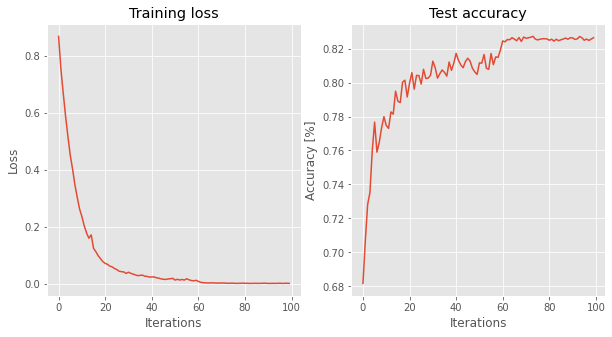

In [16]:
from train_utils import display_loss_plot
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
# Plot training loss over epochs
loss_per_epoch = [np.mean(loss_per_epoch) for loss_per_epoch in running_loss]
plt.subplot(1,2,1)
display_loss_plot(loss_per_epoch)
# Plot test accuracy over epochs
acc_per_epoch = [np.mean(acc_per_epoch) for acc_per_epoch in running_test_acc]
plt.subplot(1,2,2)
display_loss_plot(acc_per_epoch, title="Test accuracy", ylabel="Accuracy [%]")
plt.show()

In [15]:
# ! git clone https://github.com/leejeongho3214/BeYourOwnTeacher.git

Cloning into 'BeYourOwnTeacher'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 44 (delta 10), reused 44 (delta 10), pack-reused 0
Unpacking objects: 100% (44/44), done.
Checking out files: 100% (12/12), done.


# SDN on Cifar100 test
The average traing batch time is 0.42s, average epoch training time is 0.42*250 = 105s

In [2]:
# model
from SDN import multi_resnet18_kd

resnet18_sdn = multi_resnet18_kd(num_classes=100)
model = resnet18_sdn

In [4]:
# dataset
from cifar100 import prepare_cifar100_train_dataset,prepare_cifar100_test_dataset

cifar100_dir="/workspace/dataset/cifar100"
batch_size = 500
train_loader = prepare_cifar100_train_dataset(data_dir=cifar100_dir, batch_size=batch_size, 
                                                        num_workers=2)
test_loader = prepare_cifar100_test_dataset(data_dir=cifar100_dir, batch_size=batch_size, 
                                                        num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Training hyper-parameters
import torch
from torch import nn
import time
# model = torch.nn.DataParallel(model).cuda()
model=model.cuda()
best_prec1 = 0
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1, 
                            momentum=0.9, 
                            weight_decay = 1e-3)
def warm_multi_step(epoch):
    if (epoch < 1):
        return 0.1
    elif (1<=epoch<75):
        return 1
    elif 75 <= epoch < 130:
        return 0.1
    elif 130 <= epoch < 180:
        return 0.01
    elif epoch >=180:
        return 0.001
    else:
        return 1

lr_schedule = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                warm_multi_step,verbose=True)
# lr_schedule = torch.optim.lr_scheduler.MultiStepLR(optimizer,[75,90,95])
num_epoch=200
start_epoch = 0
temperature = 3
alpha = 0.1
beta = 1e-6

log_path = "./logs/log-resnetsdn-cifar100-wd0.001-epoch200.log"
with open(log_path,'w') as f:
    f.write("Training ResNetSDN wd0.001 Epoch200\r\n")

Adjusting learning rate of group 0 to 1.0000e-02.


In [7]:
from train_utils import AverageMeter
from train_utils import sdn_validate, sdn_train
from tqdm import tqdm

losses = []
acces = []
for epoch in range(start_epoch, num_epoch):
    # training
    batch_time,data_time,l1,l2,l3,l4 = sdn_train(model, train_loader,
                                             optimizer, criterion, temperature)
    lr_schedule.step()
    # Validation
    t1,t2,t3,t4 = sdn_validate(model,test_loader)
    
    losses.append([l1,l2,l3,l4])
    acces.append([t1,t2,t3,t4])
    start_epoch = epoch
    
    log_info = "Epoch %d/%d: lr=%.4f, "\
          "mean batch time = %.2fs, mean data loading time = %.2f, "\
          "Training loss = %.4f,%.4f,%.4f,%.4f, "\
          "Test accuracy = %.2f%%,%.2f%%,%.2f%%,%.2f%%," % (
        epoch+1,num_epoch, optimizer.state_dict()['param_groups'][0]['lr'], 
        batch_time,data_time,
        l1,l2,l3,l4, 
        t1,t2,t3,t4)
    with open(log_path,'a') as f:
        f.write(log_info+"\r\n")
    print(log_info)

  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/200: lr=0.1000, mean batch time = 0.51s, mean data loading time = 0.23, Training loss = 4.3274,4.3701,4.3850,4.2300, Test accuracy = 7.31%,7.41%,7.90%,9.82%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 4/200: lr=0.1000, mean batch time = 0.67s, mean data loading time = 0.46, Training loss = 3.1431,2.9980,2.8551,2.7585, Test accuracy = 22.09%,24.62%,26.48%,29.48%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5/200: lr=0.1000, mean batch time = 0.70s, mean data loading time = 0.48, Training loss = 2.8685,2.6771,2.4977,2.3801, Test accuracy = 22.27%,28.35%,30.89%,34.96%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 6/200: lr=0.1000, mean batch time = 0.72s, mean data loading time = 0.51, Training loss = 2.6552,2.4160,2.2097,2.0991, Test accuracy = 28.34%,29.21%,34.34%,37.19%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 7/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 2.4813,2.2172,1.9904,1.8769, Test accuracy = 29.53%,36.41%,41.53%,43.93%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 8/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 2.3228,2.0313,1.8102,1.6915, Test accuracy = 33.05%,37.34%,42.12%,45.27%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 9/200: lr=0.1000, mean batch time = 0.72s, mean data loading time = 0.49, Training loss = 2.2211,1.8947,1.6723,1.5574, Test accuracy = 29.74%,39.99%,43.73%,47.20%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 2.1261,1.7836,1.5505,1.4488, Test accuracy = 34.71%,40.49%,50.07%,53.24%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 11/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 2.0627,1.7101,1.4741,1.3710, Test accuracy = 36.98%,45.98%,50.15%,51.74%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 12/200: lr=0.1000, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 2.0193,1.6332,1.3880,1.2878, Test accuracy = 37.60%,47.87%,52.49%,54.59%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 13/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 1.9754,1.5725,1.3266,1.2282, Test accuracy = 38.52%,47.10%,50.45%,52.15%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 14/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.9326,1.5324,1.2789,1.1780, Test accuracy = 36.95%,45.69%,51.22%,52.55%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 15/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.8976,1.4918,1.2410,1.1431, Test accuracy = 36.51%,41.72%,45.73%,47.62%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 16/200: lr=0.1000, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.8647,1.4480,1.1878,1.0862, Test accuracy = 31.63%,39.64%,41.78%,44.37%,


Training :  75%|███████▌  | 75/100 [00:56<00:16,  1.49it/s, Msg=Time 0.673 (0.734), Data 0.462 (0.512), Loss 15.677 (15.718), Prec@1 65.60% (68.94%),]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 36/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.5939,1.1320,0.8298,0.7604, Test accuracy = 45.09%,53.57%,56.02%,57.60%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 37/200: lr=0.1000, mean batch time = 0.72s, mean data loading time = 0.49, Training loss = 1.5886,1.1257,0.8292,0.7635, Test accuracy = 46.61%,51.65%,54.50%,56.76%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 38/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 1.5801,1.1134,0.8125,0.7453, Test accuracy = 43.97%,55.24%,58.64%,60.04%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 39/200: lr=0.1000, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.5749,1.1204,0.8164,0.7507, Test accuracy = 42.45%,46.96%,49.21%,49.51%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 40/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.50, Training loss = 1.5683,1.1103,0.8027,0.7387, Test accuracy = 43.48%,49.52%,55.47%,57.25%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 41/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 1.5655,1.0986,0.7975,0.7321, Test accuracy = 41.82%,46.55%,51.44%,52.42%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 42/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.5654,1.0956,0.7850,0.7200, Test accuracy = 45.01%,55.82%,57.82%,59.23%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 43/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.5477,1.0818,0.7747,0.7091, Test accuracy = 43.23%,50.21%,51.39%,53.18%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 44/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.5453,1.0806,0.7720,0.7093, Test accuracy = 44.52%,51.57%,60.30%,61.02%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 45/200: lr=0.1000, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.5330,1.0739,0.7581,0.6941, Test accuracy = 44.16%,51.27%,55.81%,56.52%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 46/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 1.5421,1.0856,0.7752,0.7165, Test accuracy = 45.07%,53.25%,57.29%,58.80%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 47/200: lr=0.1000, mean batch time = 0.71s, mean data loading time = 0.49, Training loss = 1.5368,1.0763,0.7629,0.7013, Test accuracy = 41.90%,50.60%,56.28%,57.48%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 48/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.50, Training loss = 1.5342,1.0692,0.7700,0.7078, Test accuracy = 42.62%,50.47%,52.62%,53.88%,


Training :  71%|███████   | 71/100 [00:52<00:19,  1.45it/s, Msg=Time 0.690 (0.728), Data 0.476 (0.507), Loss 14.592 (14.095), Prec@1 75.60% (79.89%),]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 65/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.4873,1.0179,0.7009,0.6486, Test accuracy = 44.06%,54.92%,57.72%,59.66%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 66/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 1.4834,1.0133,0.6992,0.6527, Test accuracy = 48.09%,57.03%,60.62%,61.67%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 67/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.4722,1.0048,0.6839,0.6328, Test accuracy = 48.70%,55.22%,58.47%,59.78%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 68/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 1.4835,1.0114,0.6996,0.6528, Test accuracy = 42.70%,48.38%,48.72%,51.92%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 69/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.4806,1.0094,0.6872,0.6401, Test accuracy = 46.98%,53.88%,53.89%,53.72%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 70/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.4822,1.0143,0.7043,0.6599, Test accuracy = 45.13%,56.98%,60.49%,61.13%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 71/200: lr=0.1000, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 1.4728,1.0060,0.6854,0.6355, Test accuracy = 44.09%,53.93%,56.83%,57.08%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 72/200: lr=0.1000, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.4786,1.0098,0.6962,0.6499, Test accuracy = 44.67%,48.69%,55.37%,58.04%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 73/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 1.4734,1.0018,0.6836,0.6365, Test accuracy = 45.87%,56.11%,59.22%,60.64%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 74/200: lr=0.1000, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.4727,0.9975,0.6938,0.6475, Test accuracy = 45.22%,52.84%,54.91%,57.13%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 75/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.4679,0.9964,0.6833,0.6382, Test accuracy = 40.25%,56.09%,58.65%,60.92%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 76/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 1.2665,0.7602,0.3872,0.3396, Test accuracy = 61.76%,70.83%,75.64%,75.91%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 77/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.51, Training loss = 1.1891,0.6605,0.2641,0.2195, Test accuracy = 62.37%,71.25%,76.44%,76.58%,


Training :  91%|█████████ | 91/100 [01:07<00:06,  1.38it/s, Msg=Time 0.722 (0.733), Data 0.511 (0.519), Loss 11.993 (12.067), Prec@1 94.20% (94.93%),]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 95/200: lr=0.0100, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 1.0328,0.4532,0.0709,0.0450, Test accuracy = 63.44%,72.10%,76.09%,76.40%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 96/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.0286,0.4464,0.0670,0.0422, Test accuracy = 64.03%,71.66%,76.14%,76.49%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 97/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0262,0.4391,0.0628,0.0386, Test accuracy = 63.67%,71.55%,75.49%,75.95%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 98/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0231,0.4350,0.0622,0.0385, Test accuracy = 63.50%,71.81%,75.76%,76.17%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0199,0.4301,0.0601,0.0369, Test accuracy = 64.12%,71.57%,75.66%,76.03%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 100/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0157,0.4250,0.0576,0.0361, Test accuracy = 63.60%,71.87%,76.42%,76.36%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 101/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 1.0150,0.4175,0.0551,0.0338, Test accuracy = 64.52%,71.85%,76.18%,76.43%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 102/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.0139,0.4135,0.0547,0.0336, Test accuracy = 63.31%,71.61%,75.12%,75.52%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 103/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0097,0.4115,0.0532,0.0323, Test accuracy = 64.30%,71.71%,75.99%,75.92%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 104/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0093,0.4065,0.0543,0.0336, Test accuracy = 63.94%,71.53%,75.79%,75.86%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 105/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0062,0.4007,0.0521,0.0323, Test accuracy = 64.25%,71.37%,75.84%,76.01%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 106/200: lr=0.0100, mean batch time = 0.75s, mean data loading time = 0.53, Training loss = 1.0032,0.3971,0.0519,0.0320, Test accuracy = 63.34%,71.59%,75.69%,75.78%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 107/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.50, Training loss = 1.0042,0.3965,0.0511,0.0307, Test accuracy = 63.83%,71.35%,75.67%,75.82%,


Training :  98%|█████████▊| 98/100 [01:14<00:01,  1.35it/s, Msg=Time 0.752 (0.746), Data 0.523 (0.515), Loss 12.095 (12.008), Prec@1 99.40% (99.53%),] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 125/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.9853,0.3546,0.0509,0.0338, Test accuracy = 63.71%,69.84%,74.81%,74.83%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 126/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9845,0.3519,0.0517,0.0338, Test accuracy = 62.28%,70.21%,74.73%,74.89%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 127/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.9851,0.3480,0.0524,0.0353, Test accuracy = 64.03%,70.82%,74.54%,74.51%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 128/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.9837,0.3495,0.0482,0.0306, Test accuracy = 62.98%,70.43%,74.44%,74.92%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 129/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.9853,0.3451,0.0524,0.0346, Test accuracy = 63.10%,70.04%,74.22%,74.67%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 130/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.53, Training loss = 0.9842,0.3468,0.0531,0.0350, Test accuracy = 63.44%,69.59%,74.25%,74.47%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 131/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9305,0.2884,0.0357,0.0217, Test accuracy = 65.84%,72.64%,76.52%,76.86%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 132/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.9089,0.2661,0.0284,0.0166, Test accuracy = 65.77%,72.67%,76.69%,76.95%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 133/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.9030,0.2568,0.0251,0.0144, Test accuracy = 65.97%,72.75%,76.75%,76.94%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 134/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8977,0.2528,0.0246,0.0142, Test accuracy = 66.04%,72.68%,76.91%,76.80%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 135/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.50, Training loss = 0.8980,0.2488,0.0241,0.0141, Test accuracy = 65.90%,72.50%,76.54%,76.77%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 136/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8962,0.2454,0.0231,0.0129, Test accuracy = 66.00%,72.39%,76.74%,77.03%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 137/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8924,0.2420,0.0225,0.0127, Test accuracy = 65.96%,72.59%,76.78%,77.11%,


Training :  69%|██████▉   | 69/100 [00:51<00:22,  1.41it/s, Msg=Time 0.704 (0.723), Data 0.490 (0.504), Loss 11.991 (11.922), Prec@1 99.80% (99.96%),] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 156/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.8747,0.2233,0.0205,0.0117, Test accuracy = 66.09%,72.18%,76.54%,76.73%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 157/200: lr=0.0010, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 0.8748,0.2213,0.0205,0.0116, Test accuracy = 65.95%,72.31%,76.66%,76.86%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 158/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8692,0.2207,0.0208,0.0120, Test accuracy = 66.24%,72.28%,76.53%,76.94%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 159/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8702,0.2181,0.0202,0.0116, Test accuracy = 66.20%,72.34%,76.47%,76.78%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 160/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8685,0.2176,0.0207,0.0118, Test accuracy = 66.18%,72.24%,76.57%,76.82%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 161/200: lr=0.0010, mean batch time = 0.71s, mean data loading time = 0.49, Training loss = 0.8719,0.2174,0.0205,0.0118, Test accuracy = 66.01%,72.35%,76.49%,76.74%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 162/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8712,0.2172,0.0205,0.0118, Test accuracy = 65.86%,72.41%,76.55%,76.61%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 163/200: lr=0.0010, mean batch time = 0.71s, mean data loading time = 0.49, Training loss = 0.8693,0.2157,0.0206,0.0118, Test accuracy = 66.00%,72.08%,76.60%,76.63%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 164/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8653,0.2155,0.0206,0.0118, Test accuracy = 66.06%,72.12%,76.69%,76.82%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 165/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8646,0.2164,0.0203,0.0114, Test accuracy = 66.12%,72.23%,76.65%,76.98%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 166/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8662,0.2146,0.0205,0.0116, Test accuracy = 66.27%,72.24%,76.53%,76.83%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 167/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8680,0.2160,0.0203,0.0117, Test accuracy = 66.04%,72.21%,76.37%,76.79%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 168/200: lr=0.0010, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8646,0.2119,0.0204,0.0117, Test accuracy = 66.28%,71.95%,76.38%,76.81%,


Training :  54%|█████▍    | 54/100 [00:41<00:34,  1.34it/s, Msg=Time 0.753 (0.738), Data 0.529 (0.516), Loss 11.811 (11.950), Prec@1 99.80% (99.93%),] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 185/200: lr=0.0001, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8495,0.1983,0.0191,0.0111, Test accuracy = 66.18%,72.29%,76.55%,76.75%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 186/200: lr=0.0001, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8492,0.1993,0.0196,0.0113, Test accuracy = 66.22%,72.19%,76.58%,76.79%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 187/200: lr=0.0001, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8451,0.1978,0.0194,0.0111, Test accuracy = 66.29%,72.17%,76.40%,76.73%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 188/200: lr=0.0001, mean batch time = 0.71s, mean data loading time = 0.49, Training loss = 0.8464,0.1955,0.0189,0.0108, Test accuracy = 66.26%,72.07%,76.51%,76.87%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 189/200: lr=0.0001, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8518,0.1989,0.0195,0.0110, Test accuracy = 66.29%,72.13%,76.48%,76.68%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 190/200: lr=0.0001, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8483,0.1973,0.0195,0.0113, Test accuracy = 66.21%,71.97%,76.56%,76.74%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 191/200: lr=0.0001, mean batch time = 0.73s, mean data loading time = 0.52, Training loss = 0.8511,0.1976,0.0193,0.0110, Test accuracy = 66.40%,71.99%,76.51%,76.81%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 192/200: lr=0.0001, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8491,0.1990,0.0197,0.0113, Test accuracy = 66.32%,72.16%,76.57%,76.78%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 193/200: lr=0.0001, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.8492,0.1993,0.0196,0.0114, Test accuracy = 66.34%,72.11%,76.53%,76.87%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 194/200: lr=0.0001, mean batch time = 0.73s, mean data loading time = 0.50, Training loss = 0.8456,0.1990,0.0198,0.0114, Test accuracy = 66.31%,71.95%,76.44%,76.76%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 195/200: lr=0.0001, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8480,0.1990,0.0193,0.0111, Test accuracy = 66.23%,72.19%,76.43%,76.79%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 196/200: lr=0.0001, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8468,0.1971,0.0191,0.0108, Test accuracy = 66.23%,72.27%,76.53%,76.90%,


  0%|          | 0/20 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 197/200: lr=0.0001, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.8474,0.1980,0.0199,0.0114, Test accuracy = 66.35%,72.15%,76.53%,76.82%,


Training : 100%|██████████| 100/100 [01:12<00:00,  1.37it/s, Msg=Time 0.726 (0.724), Data 0.504 (0.503), Loss 11.891 (11.940), Prec@1 99.80% (99.96%),]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
# Save the trained parameters to disk
torch.save(model.state_dict(), 
    "/workspace/notebooks/FSS/models/resnet18-cifar100-SDN-66.14-71.95-76.54-76.82.pth")

# DSN on Cifar100 test

In [ ]:
# model
from resnet import ResNetDSN,ResNetFSS,BasicBlock,Bottleneck
model = ResNetDSN(BasicBlock,layers=[2,2,2,2], num_classes=100)

In [9]:
# dataset
from cifar100 import prepare_cifar100_train_dataset,prepare_cifar100_test_dataset

cifar100_dir="/workspace/dataset/cifar100"
batch_size = 500
train_loader = prepare_cifar100_train_dataset(data_dir=cifar100_dir, batch_size=batch_size, 
                                                        num_workers=2)
test_loader = prepare_cifar100_test_dataset(data_dir=cifar100_dir, batch_size=batch_size, 
                                                        num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
# Training hyper-parameters
import torch
from torch import nn
import time
# model = torch.nn.DataParallel(model).cuda()
model=model.cuda()
best_prec1 = 0
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1, 
                            momentum=0.9, 
                            weight_decay = 1e-3)
def warm_multi_step(epoch):
    if (epoch < 1):
        return 0.1
    elif (1<=epoch<75):
        return 1
    elif 75 <= epoch < 130:
        return 0.1
    elif 130 <= epoch < 180:
        return 0.01
    elif epoch >=180:
        return 0.001
    else:
        return 1

lr_schedule = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                warm_multi_step,verbose=True)
# lr_schedule = torch.optim.lr_scheduler.MultiStepLR(optimizer,[75,90,95])
num_epoch=200
start_epoch = 0
temperature = 3
alpha = 0.1
beta = 1e-6

log_path = "./logs/log-resnetdsn-cifar100-wd0.001-epoch200.log"
with open(log_path,'w') as f:
    f.write("Training ResNetDSN wd0.001 Epoch200\r\n")

Adjusting learning rate of group 0 to 1.0000e-02.


In [11]:
from train_utils import AverageMeter
from train_utils import dsn_validate, dsn_train
from tqdm import tqdm

losses = []
acces = []
for epoch in range(start_epoch, num_epoch):
    # training
    batch_time,data_time,l1,l2,l3,l4 = dsn_train(model, train_loader,
                                             optimizer, criterion, temperature)
    # Validation
    t1,t2,t3,t4 = dsn_validate(model,test_loader)
    lr_schedule.step()
    
    losses.append([l1,l2,l3,l4])
    acces.append([t1,t2,t3,t4])
    start_epoch = epoch
    
    log_info = "Epoch %d/%d: lr=%.4f, "\
          "mean batch time = %.2fs, mean data loading time = %.2f, "\
          "Training loss = %.4f,%.4f,%.4f,%.4f, "\
          "Test accuracy = %.2f%%,%.2f%%,%.2f%%,%.2f%%," % (
        epoch+1,num_epoch, optimizer.state_dict()['param_groups'][0]['lr'], 
        batch_time,data_time,
        l1,l2,l3,l4, 
        t1,t2,t3,t4)
    with open(log_path,'a') as f:
        f.write(log_info+"\r\n")
    print(log_info)

Training :   0%|          | 0/100 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 4)

# DSN-BK on Cifar100 test

In [12]:
# model
from resnet import ResNetDSNBK,ResNetFSS,BasicBlock,Bottleneck
model = ResNetDSNBK(BasicBlock,layers=[2,2,2,2], num_classes=100)

In [13]:
# dataset
from cifar100 import prepare_cifar100_train_dataset,prepare_cifar100_test_dataset

cifar100_dir="/workspace/dataset/cifar100"
batch_size = 500
train_loader = prepare_cifar100_train_dataset(data_dir=cifar100_dir, batch_size=batch_size, 
                                                        num_workers=2)
test_loader = prepare_cifar100_test_dataset(data_dir=cifar100_dir, batch_size=batch_size, 
                                                        num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
# Training hyper-parameters
import torch
from torch import nn
import time
# model = torch.nn.DataParallel(model).cuda()
model=model.cuda()
best_prec1 = 0
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1, 
                            momentum=0.9, 
                            weight_decay = 1e-3)
def warm_multi_step(epoch):
    if (epoch < 1):
        return 0.1
    elif (1<=epoch<75):
        return 1
    elif 75 <= epoch < 130:
        return 0.1
    elif 130 <= epoch < 180:
        return 0.01
    elif epoch >=180:
        return 0.001
    else:
        return 1

lr_schedule = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                warm_multi_step,verbose=True)
# lr_schedule = torch.optim.lr_scheduler.MultiStepLR(optimizer,[75,90,95])
num_epoch=200
start_epoch = 0
temperature = 3
alpha = 0.1
beta = 1e-6

log_path = "./logs/log-resnetdsnbk-cifar100-wd0.001-epoch200.log"
with open(log_path,'w') as f:
    f.write("Training ResNetDSN-BK wd0.001 Epoch200\r\n")

Adjusting learning rate of group 0 to 1.0000e-02.


In [15]:
from train_utils import AverageMeter
from train_utils import dsn_validate, dsn_train
from tqdm import tqdm

losses = []
acces = []
for epoch in range(start_epoch, num_epoch):
    # training
    batch_time,data_time,l1,l2,l3,l4 = dsn_train(model, train_loader,
                                             optimizer, criterion, temperature)
    # Validation
    t1,t2,t3,t4 = dsn_validate(model,test_loader)
    lr_schedule.step()
    
    losses.append([l1,l2,l3,l4])
    acces.append([t1,t2,t3,t4])
    start_epoch = epoch
    
    log_info = "Epoch %d/%d: lr=%.4f, "\
          "mean batch time = %.2fs, mean data loading time = %.2f, "\
          "Training loss = %.4f,%.4f,%.4f,%.4f, "\
          "Test accuracy = %.2f%%,%.2f%%,%.2f%%,%.2f%%," % (
        epoch+1,num_epoch, optimizer.state_dict()['param_groups'][0]['lr'], 
        batch_time,data_time,
        l1,l2,l3,l4, 
        t1,t2,t3,t4)
    with open(log_path,'a') as f:
        f.write(log_info+"\r\n")
    print(log_info)

Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1/200: lr=0.1000, mean batch time = 0.35s, mean data loading time = 0.23, Training loss = 4.1310,4.1112,4.1055,4.1477, Test accuracy = 10.26%,10.50%,11.07%,10.63%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2/200: lr=0.1000, mean batch time = 0.36s, mean data loading time = 0.24, Training loss = 3.7370,3.6833,3.6470,3.7143, Test accuracy = 15.73%,16.90%,17.00%,15.52%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3/200: lr=0.1000, mean batch time = 0.51s, mean data loading time = 0.35, Training loss = 3.3169,3.1869,3.0724,3.0916, Test accuracy = 19.56%,20.73%,22.40%,22.26%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4/200: lr=0.1000, mean batch time = 0.65s, mean data loading time = 0.45, Training loss = 3.0276,2.8276,2.6601,2.6541, Test accuracy = 21.11%,26.17%,30.13%,30.67%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5/200: lr=0.1000, mean batch time = 0.69s, mean data loading time = 0.48, Training loss = 2.7866,2.5305,2.3207,2.2948, Test accuracy = 27.81%,30.64%,34.39%,35.18%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6/200: lr=0.1000, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 2.5753,2.2851,2.0535,2.0132, Test accuracy = 30.71%,31.18%,37.26%,38.50%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 7/200: lr=0.1000, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 2.4178,2.0995,1.8514,1.8080, Test accuracy = 30.01%,35.56%,43.51%,43.71%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 8/200: lr=0.1000, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 2.2865,1.9534,1.7011,1.6529, Test accuracy = 33.48%,37.51%,45.47%,44.61%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 9/200: lr=0.1000, mean batch time = 0.68s, mean data loading time = 0.47, Training loss = 2.1806,1.8277,1.5657,1.5210, Test accuracy = 36.52%,44.27%,48.01%,49.23%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 10/200: lr=0.1000, mean batch time = 0.67s, mean data loading time = 0.46, Training loss = 2.1141,1.7465,1.4815,1.4341, Test accuracy = 38.81%,44.31%,49.87%,51.39%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 11/200: lr=0.1000, mean batch time = 0.65s, mean data loading time = 0.45, Training loss = 2.0595,1.6684,1.3977,1.3501, Test accuracy = 34.41%,40.63%,47.93%,47.16%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 12/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 2.0104,1.6110,1.3301,1.2834, Test accuracy = 39.72%,40.26%,46.91%,47.00%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 13/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.9623,1.5538,1.2711,1.2241, Test accuracy = 39.75%,45.34%,51.23%,50.85%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 14/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.9388,1.5153,1.2222,1.1689, Test accuracy = 35.46%,43.62%,45.60%,47.64%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 15/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.8984,1.4701,1.1743,1.1273, Test accuracy = 34.21%,42.71%,48.62%,50.38%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 16/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.8663,1.4315,1.1334,1.0840, Test accuracy = 43.67%,49.15%,55.87%,56.46%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 17/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.8375,1.4050,1.1068,1.0584, Test accuracy = 41.32%,50.72%,54.54%,56.60%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 18/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.8069,1.3766,1.0651,1.0167, Test accuracy = 43.07%,46.11%,53.02%,53.88%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 19/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.7948,1.3542,1.0448,0.9906, Test accuracy = 38.46%,48.96%,53.14%,54.00%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 20/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7761,1.3236,1.0126,0.9680, Test accuracy = 41.48%,49.75%,53.15%,53.97%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 21/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.7666,1.3108,0.9975,0.9519, Test accuracy = 40.62%,48.62%,53.68%,55.01%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 22/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7419,1.2950,0.9757,0.9326, Test accuracy = 37.76%,45.07%,50.37%,49.80%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 23/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.42, Training loss = 1.7229,1.2699,0.9526,0.9029, Test accuracy = 40.65%,49.72%,53.86%,54.33%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 24/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7153,1.2615,0.9387,0.8919, Test accuracy = 43.17%,49.44%,57.12%,58.03%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 25/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.7114,1.2537,0.9263,0.8829, Test accuracy = 40.38%,47.49%,54.15%,55.10%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 26/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.44, Training loss = 1.6913,1.2339,0.9084,0.8646, Test accuracy = 38.90%,52.07%,54.41%,54.40%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 27/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.6858,1.2213,0.8884,0.8443, Test accuracy = 35.20%,47.74%,50.24%,51.88%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 28/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6741,1.2026,0.8700,0.8291, Test accuracy = 41.11%,50.36%,51.30%,52.89%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 29/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.6542,1.1915,0.8562,0.8150, Test accuracy = 46.20%,47.75%,57.10%,56.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 30/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6654,1.1940,0.8576,0.8165, Test accuracy = 42.42%,51.44%,56.57%,56.50%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 31/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.6397,1.1661,0.8270,0.7859, Test accuracy = 40.02%,50.84%,54.86%,53.30%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 32/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6438,1.1738,0.8285,0.7885, Test accuracy = 38.50%,50.63%,54.90%,55.37%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 33/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.6278,1.1585,0.8149,0.7752, Test accuracy = 43.64%,50.83%,53.24%,51.33%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 34/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.6271,1.1490,0.8068,0.7667, Test accuracy = 44.50%,55.24%,57.00%,56.23%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 35/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.6126,1.1448,0.8018,0.7628, Test accuracy = 44.63%,53.45%,56.22%,56.03%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 36/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.6171,1.1459,0.7998,0.7629, Test accuracy = 40.46%,48.17%,56.07%,56.35%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 37/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.6117,1.1322,0.7936,0.7538, Test accuracy = 41.64%,49.42%,53.63%,53.30%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 38/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5974,1.1253,0.7848,0.7469, Test accuracy = 45.31%,54.49%,59.82%,60.60%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 39/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.5962,1.1155,0.7613,0.7217, Test accuracy = 42.67%,51.72%,58.08%,57.56%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 40/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5917,1.1126,0.7629,0.7240, Test accuracy = 47.46%,56.41%,60.76%,59.80%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 41/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.5810,1.1056,0.7491,0.7114, Test accuracy = 44.55%,49.56%,50.22%,50.81%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 42/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5841,1.1043,0.7569,0.7213, Test accuracy = 34.11%,48.73%,55.52%,56.17%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 43/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.5887,1.1058,0.7504,0.7144, Test accuracy = 45.78%,55.87%,59.22%,59.67%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 44/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.5860,1.1039,0.7539,0.7203, Test accuracy = 47.63%,50.75%,55.30%,55.08%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 45/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5746,1.0972,0.7468,0.7130, Test accuracy = 43.53%,51.75%,60.08%,60.67%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 46/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5588,1.0804,0.7258,0.6890, Test accuracy = 46.37%,48.44%,55.02%,55.30%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 47/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5635,1.0796,0.7300,0.6951, Test accuracy = 46.11%,51.53%,53.54%,52.85%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 48/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5519,1.0750,0.7196,0.6869, Test accuracy = 41.97%,50.17%,56.04%,56.29%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 49/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.5587,1.0701,0.7195,0.6841, Test accuracy = 44.84%,49.20%,54.34%,55.48%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 50/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.5460,1.0684,0.7121,0.6786, Test accuracy = 40.90%,52.59%,56.48%,57.02%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 51/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5595,1.0722,0.7203,0.6859, Test accuracy = 43.13%,52.96%,56.48%,57.12%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 52/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.5360,1.0553,0.7035,0.6704, Test accuracy = 46.02%,45.27%,48.38%,47.45%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 53/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5468,1.0655,0.7155,0.6809, Test accuracy = 40.37%,48.88%,53.61%,53.28%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 54/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5377,1.0560,0.7059,0.6758, Test accuracy = 37.89%,48.58%,57.77%,58.46%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 55/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.44, Training loss = 1.5369,1.0484,0.6932,0.6638, Test accuracy = 45.52%,51.95%,58.57%,58.43%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 56/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.44, Training loss = 1.5278,1.0462,0.6853,0.6553, Test accuracy = 45.60%,52.76%,59.56%,59.62%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 57/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5306,1.0524,0.7033,0.6716, Test accuracy = 48.09%,49.95%,57.12%,58.30%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 58/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5317,1.0440,0.6947,0.6643, Test accuracy = 40.73%,49.47%,56.78%,56.98%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 59/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5246,1.0411,0.6836,0.6512, Test accuracy = 44.50%,55.59%,61.11%,61.21%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 60/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5238,1.0354,0.6835,0.6534, Test accuracy = 42.91%,50.76%,55.57%,56.31%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 61/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5256,1.0424,0.6888,0.6607, Test accuracy = 45.19%,54.32%,57.13%,58.02%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 62/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.5150,1.0303,0.6693,0.6394, Test accuracy = 43.09%,51.21%,53.83%,54.85%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 64/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5115,1.0306,0.6780,0.6511, Test accuracy = 41.83%,50.25%,55.28%,55.29%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 65/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.5203,1.0270,0.6681,0.6390, Test accuracy = 47.07%,52.78%,54.77%,55.35%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 66/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.5060,1.0192,0.6656,0.6383, Test accuracy = 43.96%,54.29%,59.52%,59.33%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 67/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5120,1.0306,0.6731,0.6484, Test accuracy = 43.18%,51.32%,52.50%,51.55%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 68/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.5033,1.0239,0.6630,0.6349, Test accuracy = 40.63%,45.71%,50.42%,50.56%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 69/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.44, Training loss = 1.5007,1.0128,0.6659,0.6407, Test accuracy = 41.96%,51.76%,60.59%,60.34%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 70/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5163,1.0190,0.6656,0.6379, Test accuracy = 45.29%,43.82%,53.20%,51.03%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 71/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.44, Training loss = 1.5090,1.0254,0.6629,0.6396, Test accuracy = 43.60%,56.35%,59.27%,59.12%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 72/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.5009,1.0051,0.6431,0.6180, Test accuracy = 43.59%,50.98%,55.85%,57.66%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 73/200: lr=0.1000, mean batch time = 0.66s, mean data loading time = 0.46, Training loss = 1.5044,1.0108,0.6632,0.6347, Test accuracy = 43.50%,49.20%,55.69%,55.94%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 74/200: lr=0.1000, mean batch time = 0.66s, mean data loading time = 0.46, Training loss = 1.4935,1.0145,0.6539,0.6307, Test accuracy = 47.17%,53.95%,59.50%,59.87%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 75/200: lr=0.0100, mean batch time = 0.65s, mean data loading time = 0.45, Training loss = 1.4972,1.0068,0.6481,0.6227, Test accuracy = 47.59%,56.07%,59.39%,59.36%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 76/200: lr=0.0100, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.3006,0.7669,0.3543,0.3154, Test accuracy = 61.22%,70.54%,75.14%,75.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 77/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.2187,0.6652,0.2456,0.2017, Test accuracy = 61.68%,70.90%,75.64%,75.98%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 78/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.1934,0.6294,0.2050,0.1631, Test accuracy = 61.78%,71.26%,75.99%,76.70%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 79/200: lr=0.0100, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.1717,0.6059,0.1793,0.1379, Test accuracy = 62.29%,71.21%,75.99%,76.22%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 80/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1594,0.5848,0.1616,0.1217, Test accuracy = 62.06%,71.41%,75.57%,76.01%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 81/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.1445,0.5724,0.1475,0.1084, Test accuracy = 62.75%,71.87%,75.89%,76.28%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 82/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.1319,0.5566,0.1344,0.0971, Test accuracy = 62.57%,71.88%,75.89%,76.11%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 83/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1195,0.5442,0.1210,0.0853, Test accuracy = 62.84%,71.63%,75.84%,76.14%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 84/200: lr=0.0100, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.1143,0.5331,0.1149,0.0797, Test accuracy = 62.16%,71.78%,75.65%,75.91%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 85/200: lr=0.0100, mean batch time = 0.66s, mean data loading time = 0.46, Training loss = 1.1049,0.5243,0.1081,0.0732, Test accuracy = 62.79%,71.82%,76.00%,76.14%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 86/200: lr=0.0100, mean batch time = 0.68s, mean data loading time = 0.47, Training loss = 1.0982,0.5131,0.0987,0.0649, Test accuracy = 62.82%,71.62%,75.45%,75.59%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 87/200: lr=0.0100, mean batch time = 0.69s, mean data loading time = 0.48, Training loss = 1.0888,0.5038,0.0928,0.0599, Test accuracy = 62.36%,72.35%,75.83%,76.31%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 88/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.49, Training loss = 1.0825,0.4937,0.0866,0.0556, Test accuracy = 62.97%,71.74%,76.03%,76.13%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 89/200: lr=0.0100, mean batch time = 0.69s, mean data loading time = 0.48, Training loss = 1.0766,0.4848,0.0824,0.0517, Test accuracy = 62.99%,72.00%,75.81%,76.03%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 90/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 1.0744,0.4779,0.0767,0.0475, Test accuracy = 63.34%,72.16%,76.08%,75.95%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 91/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0671,0.4701,0.0733,0.0457, Test accuracy = 62.66%,71.93%,75.43%,75.55%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 92/200: lr=0.0100, mean batch time = 0.70s, mean data loading time = 0.49, Training loss = 1.0636,0.4635,0.0704,0.0420, Test accuracy = 63.13%,71.97%,75.48%,75.73%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 93/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.0565,0.4554,0.0671,0.0405, Test accuracy = 63.33%,72.27%,75.89%,75.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 94/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 1.0535,0.4482,0.0632,0.0371, Test accuracy = 63.03%,72.16%,75.93%,76.00%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 95/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.0462,0.4431,0.0632,0.0380, Test accuracy = 62.76%,71.61%,75.71%,75.65%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 96/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 1.0418,0.4363,0.0589,0.0343, Test accuracy = 62.76%,71.66%,75.61%,75.73%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 97/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.49, Training loss = 1.0371,0.4292,0.0568,0.0329, Test accuracy = 62.61%,71.62%,75.88%,75.98%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 98/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0319,0.4200,0.0539,0.0317, Test accuracy = 62.50%,71.67%,75.82%,75.88%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 99/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.49, Training loss = 1.0293,0.4177,0.0528,0.0300, Test accuracy = 63.12%,71.77%,75.88%,75.84%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 100/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 1.0276,0.4141,0.0523,0.0306, Test accuracy = 62.94%,71.56%,75.83%,75.90%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 101/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.51, Training loss = 1.0269,0.4081,0.0509,0.0299, Test accuracy = 63.19%,72.22%,75.88%,76.05%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 102/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 1.0204,0.4027,0.0485,0.0275, Test accuracy = 62.08%,71.31%,75.61%,75.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 103/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.51, Training loss = 1.0202,0.3982,0.0476,0.0273, Test accuracy = 63.27%,71.55%,75.55%,75.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 104/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.51, Training loss = 1.0109,0.3878,0.0462,0.0264, Test accuracy = 62.71%,71.27%,75.14%,75.26%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 105/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 1.0097,0.3875,0.0465,0.0271, Test accuracy = 62.95%,72.11%,75.30%,75.59%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 106/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 1.0088,0.3836,0.0463,0.0277, Test accuracy = 62.80%,71.34%,75.64%,75.80%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 107/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 1.0066,0.3796,0.0448,0.0255, Test accuracy = 63.27%,71.91%,76.14%,76.03%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 108/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.49, Training loss = 0.9996,0.3718,0.0436,0.0254, Test accuracy = 62.28%,70.89%,75.18%,75.18%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 109/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 0.9978,0.3700,0.0455,0.0278, Test accuracy = 62.07%,70.58%,75.09%,75.48%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 110/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.52, Training loss = 0.9973,0.3659,0.0415,0.0241, Test accuracy = 62.79%,71.55%,75.92%,75.89%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 111/200: lr=0.0100, mean batch time = 0.71s, mean data loading time = 0.50, Training loss = 0.9964,0.3606,0.0416,0.0243, Test accuracy = 63.35%,71.55%,75.21%,75.35%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 112/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9939,0.3594,0.0436,0.0262, Test accuracy = 62.58%,70.98%,75.15%,75.48%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 113/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.52, Training loss = 0.9888,0.3561,0.0441,0.0267, Test accuracy = 62.50%,70.21%,74.83%,74.97%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 114/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9870,0.3485,0.0421,0.0246, Test accuracy = 62.44%,71.12%,75.60%,75.63%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 115/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9848,0.3458,0.0415,0.0251, Test accuracy = 62.63%,70.18%,74.30%,74.70%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 116/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9814,0.3425,0.0401,0.0241, Test accuracy = 61.82%,70.56%,74.81%,75.21%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 117/200: lr=0.0100, mean batch time = 0.72s, mean data loading time = 0.50, Training loss = 0.9811,0.3431,0.0435,0.0270, Test accuracy = 62.37%,70.81%,75.16%,75.27%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 118/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9773,0.3380,0.0420,0.0255, Test accuracy = 62.88%,70.51%,74.93%,75.41%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 119/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9794,0.3378,0.0435,0.0268, Test accuracy = 62.23%,70.39%,74.99%,75.14%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 120/200: lr=0.0100, mean batch time = 0.75s, mean data loading time = 0.53, Training loss = 0.9757,0.3310,0.0420,0.0259, Test accuracy = 61.62%,70.52%,74.89%,75.32%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 121/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9767,0.3330,0.0438,0.0279, Test accuracy = 61.76%,70.11%,74.70%,75.29%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 122/200: lr=0.0100, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.9743,0.3315,0.0451,0.0287, Test accuracy = 62.65%,70.62%,74.67%,75.10%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 123/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9714,0.3277,0.0421,0.0260, Test accuracy = 62.64%,70.23%,75.11%,75.11%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 124/200: lr=0.0100, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.9682,0.3254,0.0453,0.0291, Test accuracy = 61.01%,69.97%,74.53%,74.87%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 125/200: lr=0.0100, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.9669,0.3255,0.0435,0.0276, Test accuracy = 62.07%,70.37%,74.92%,75.17%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 126/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.9681,0.3210,0.0441,0.0288, Test accuracy = 60.45%,68.97%,73.28%,73.72%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 127/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.9647,0.3216,0.0473,0.0307, Test accuracy = 62.33%,70.14%,74.59%,74.88%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 128/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.9638,0.3181,0.0443,0.0278, Test accuracy = 62.03%,69.62%,74.50%,74.61%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 129/200: lr=0.0100, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.9645,0.3149,0.0432,0.0276, Test accuracy = 62.21%,70.31%,74.22%,74.04%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 130/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.9661,0.3171,0.0462,0.0304, Test accuracy = 61.70%,69.55%,73.84%,74.28%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 131/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.53, Training loss = 0.9111,0.2668,0.0318,0.0192, Test accuracy = 64.76%,72.67%,76.53%,76.61%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 132/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8912,0.2438,0.0254,0.0147, Test accuracy = 64.83%,72.44%,76.48%,76.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 133/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8839,0.2357,0.0234,0.0133, Test accuracy = 64.91%,72.47%,76.57%,76.80%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 134/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8777,0.2319,0.0223,0.0126, Test accuracy = 65.51%,72.42%,76.60%,76.61%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 135/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8775,0.2289,0.0215,0.0123, Test accuracy = 65.06%,72.40%,76.46%,76.64%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 136/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8731,0.2265,0.0207,0.0118, Test accuracy = 65.42%,72.49%,76.66%,76.74%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 137/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8702,0.2241,0.0203,0.0115, Test accuracy = 65.08%,72.49%,76.47%,76.77%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 138/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8723,0.2244,0.0203,0.0115, Test accuracy = 65.26%,72.53%,76.73%,76.78%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 139/200: lr=0.0010, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8696,0.2207,0.0200,0.0114, Test accuracy = 64.95%,72.31%,76.56%,76.90%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 140/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.53, Training loss = 0.8663,0.2199,0.0198,0.0113, Test accuracy = 65.24%,72.50%,76.42%,76.59%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 141/200: lr=0.0010, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8630,0.2195,0.0199,0.0113, Test accuracy = 65.27%,72.29%,76.48%,76.78%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 142/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8594,0.2158,0.0199,0.0114, Test accuracy = 65.08%,72.30%,76.58%,76.66%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 143/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8643,0.2155,0.0196,0.0112, Test accuracy = 65.29%,72.25%,76.49%,76.61%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 144/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8573,0.2128,0.0190,0.0110, Test accuracy = 65.07%,72.34%,76.69%,76.81%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 145/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8596,0.2139,0.0192,0.0111, Test accuracy = 65.17%,72.34%,76.66%,76.67%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 146/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8592,0.2138,0.0194,0.0111, Test accuracy = 65.09%,72.12%,76.74%,76.93%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 147/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8556,0.2112,0.0192,0.0110, Test accuracy = 65.15%,72.26%,76.63%,76.71%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 148/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8564,0.2094,0.0188,0.0108, Test accuracy = 65.12%,72.18%,76.60%,76.72%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 149/200: lr=0.0010, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8552,0.2102,0.0190,0.0108, Test accuracy = 65.23%,72.29%,76.68%,76.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 150/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.53, Training loss = 0.8546,0.2078,0.0186,0.0106, Test accuracy = 65.06%,72.21%,76.62%,76.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 151/200: lr=0.0010, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8555,0.2063,0.0188,0.0108, Test accuracy = 65.29%,72.34%,76.76%,77.00%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 152/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.8529,0.2056,0.0184,0.0104, Test accuracy = 65.21%,72.23%,76.51%,76.63%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 153/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8526,0.2062,0.0184,0.0106, Test accuracy = 65.36%,72.18%,76.80%,76.66%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 154/200: lr=0.0010, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8540,0.2043,0.0182,0.0103, Test accuracy = 65.19%,72.61%,76.52%,76.75%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 155/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8490,0.2061,0.0184,0.0105, Test accuracy = 65.08%,72.21%,76.74%,76.86%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 156/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8517,0.2039,0.0187,0.0110, Test accuracy = 65.29%,72.20%,76.72%,76.74%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 157/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8513,0.2028,0.0187,0.0108, Test accuracy = 65.17%,72.34%,76.61%,76.73%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 158/200: lr=0.0010, mean batch time = 0.76s, mean data loading time = 0.54, Training loss = 0.8488,0.2003,0.0184,0.0106, Test accuracy = 65.17%,72.23%,76.65%,76.73%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 159/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8487,0.2007,0.0182,0.0104, Test accuracy = 65.15%,72.24%,76.58%,76.86%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 160/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8484,0.1996,0.0184,0.0107, Test accuracy = 64.99%,72.14%,76.67%,76.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 161/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.53, Training loss = 0.8466,0.1996,0.0178,0.0102, Test accuracy = 65.26%,72.19%,76.63%,76.60%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 162/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8452,0.1979,0.0180,0.0105, Test accuracy = 65.13%,72.21%,76.56%,76.71%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 163/200: lr=0.0010, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8430,0.1984,0.0183,0.0105, Test accuracy = 65.23%,72.29%,76.63%,76.42%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 164/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8458,0.1986,0.0184,0.0107, Test accuracy = 65.24%,72.18%,76.58%,76.67%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 165/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8407,0.1969,0.0179,0.0103, Test accuracy = 65.21%,72.19%,76.66%,76.73%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 166/200: lr=0.0010, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8416,0.1980,0.0183,0.0106, Test accuracy = 65.14%,72.22%,76.64%,76.75%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 167/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8377,0.1955,0.0181,0.0104, Test accuracy = 65.02%,72.45%,76.60%,76.75%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 168/200: lr=0.0010, mean batch time = 0.77s, mean data loading time = 0.54, Training loss = 0.8392,0.1954,0.0182,0.0106, Test accuracy = 65.16%,72.48%,76.67%,76.85%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 169/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8413,0.1949,0.0182,0.0106, Test accuracy = 65.35%,72.33%,76.71%,76.75%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 170/200: lr=0.0010, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8375,0.1929,0.0179,0.0104, Test accuracy = 65.26%,72.33%,76.71%,76.75%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 171/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8390,0.1949,0.0179,0.0104, Test accuracy = 65.04%,72.42%,76.58%,76.68%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 172/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8396,0.1913,0.0181,0.0106, Test accuracy = 65.27%,72.29%,76.73%,76.77%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 173/200: lr=0.0010, mean batch time = 0.73s, mean data loading time = 0.51, Training loss = 0.8381,0.1925,0.0183,0.0106, Test accuracy = 65.10%,72.11%,76.63%,76.64%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 174/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8372,0.1910,0.0182,0.0107, Test accuracy = 65.10%,72.32%,76.53%,76.83%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 175/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.8356,0.1910,0.0184,0.0109, Test accuracy = 64.90%,72.26%,76.61%,76.54%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 176/200: lr=0.0010, mean batch time = 0.77s, mean data loading time = 0.54, Training loss = 0.8335,0.1904,0.0182,0.0107, Test accuracy = 65.13%,72.02%,76.69%,76.51%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 177/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8326,0.1899,0.0183,0.0106, Test accuracy = 65.34%,72.08%,76.64%,76.54%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 178/200: lr=0.0010, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8344,0.1893,0.0179,0.0104, Test accuracy = 65.09%,72.22%,76.45%,76.49%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 180/200: lr=0.0001, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8334,0.1886,0.0181,0.0108, Test accuracy = 65.04%,72.14%,76.63%,76.63%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 181/200: lr=0.0001, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8215,0.1846,0.0176,0.0103, Test accuracy = 65.17%,72.23%,76.71%,76.68%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 182/200: lr=0.0001, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8251,0.1820,0.0174,0.0101, Test accuracy = 65.11%,72.16%,76.59%,76.72%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 183/200: lr=0.0001, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8236,0.1829,0.0177,0.0104, Test accuracy = 65.21%,72.17%,76.55%,76.63%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 184/200: lr=0.0001, mean batch time = 0.75s, mean data loading time = 0.52, Training loss = 0.8249,0.1825,0.0173,0.0103, Test accuracy = 65.22%,72.11%,76.60%,76.81%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 185/200: lr=0.0001, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8226,0.1814,0.0173,0.0101, Test accuracy = 65.27%,72.07%,76.51%,76.65%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 186/200: lr=0.0001, mean batch time = 0.78s, mean data loading time = 0.55, Training loss = 0.8227,0.1813,0.0172,0.0101, Test accuracy = 65.20%,72.14%,76.61%,76.60%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 187/200: lr=0.0001, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8211,0.1823,0.0176,0.0102, Test accuracy = 65.29%,72.19%,76.64%,76.60%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 188/200: lr=0.0001, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8220,0.1827,0.0178,0.0104, Test accuracy = 65.24%,72.14%,76.58%,76.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 189/200: lr=0.0001, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8216,0.1807,0.0175,0.0103, Test accuracy = 65.19%,72.07%,76.57%,76.60%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 190/200: lr=0.0001, mean batch time = 0.75s, mean data loading time = 0.53, Training loss = 0.8193,0.1818,0.0172,0.0100, Test accuracy = 65.23%,72.16%,76.45%,76.55%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 191/200: lr=0.0001, mean batch time = 0.77s, mean data loading time = 0.54, Training loss = 0.8194,0.1806,0.0173,0.0101, Test accuracy = 65.29%,72.16%,76.60%,76.65%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 192/200: lr=0.0001, mean batch time = 0.74s, mean data loading time = 0.52, Training loss = 0.8244,0.1809,0.0171,0.0098, Test accuracy = 65.33%,72.07%,76.60%,76.57%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 193/200: lr=0.0001, mean batch time = 0.77s, mean data loading time = 0.54, Training loss = 0.8217,0.1798,0.0172,0.0101, Test accuracy = 65.30%,72.26%,76.59%,76.59%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 194/200: lr=0.0001, mean batch time = 0.76s, mean data loading time = 0.53, Training loss = 0.8227,0.1819,0.0176,0.0102, Test accuracy = 65.36%,72.25%,76.53%,76.68%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 195/200: lr=0.0001, mean batch time = 0.77s, mean data loading time = 0.54, Training loss = 0.8189,0.1800,0.0170,0.0099, Test accuracy = 65.36%,72.05%,76.52%,76.64%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 196/200: lr=0.0001, mean batch time = 0.75s, mean data loading time = 0.53, Training loss = 0.8231,0.1824,0.0176,0.0102, Test accuracy = 65.24%,72.21%,76.68%,76.67%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 197/200: lr=0.0001, mean batch time = 0.77s, mean data loading time = 0.54, Training loss = 0.8206,0.1805,0.0172,0.0101, Test accuracy = 65.33%,72.18%,76.62%,76.79%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 198/200: lr=0.0001, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.8215,0.1795,0.0172,0.0099, Test accuracy = 65.24%,72.17%,76.62%,76.68%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 199/200: lr=0.0001, mean batch time = 0.76s, mean data loading time = 0.54, Training loss = 0.8215,0.1804,0.0172,0.0102, Test accuracy = 65.32%,72.33%,76.58%,76.70%,


100%|██████████| 20/20 [00:03<00:00,  6.39it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 200/200: lr=0.0001, mean batch time = 0.74s, mean data loading time = 0.51, Training loss = 0.8224,0.1826,0.0174,0.0103, Test accuracy = 65.33%,72.11%,76.48%,76.66%,


In [7]:
# Save the trained parameters to disk
torch.save(model.state_dict(), "/workspace/notebooks/FSS/models/pretrained_resnet18-DSN-BK.pth")

# FSS on Cifar100 test

In [18]:
# model
from resnet import ResNetDSN,ResNetFSS,BasicBlock,Bottleneck,FeatureReroute
model = ResNetFSS(BasicBlock,layers=[2,2,2,2], num_classes=100)
# saved_state = torch.load("./FSS/models/pretrained_resnet18-FSS.pth", map_location=torch.device("cpu"))
# model.load_state_dict(saved_state)

In [22]:
# Training hyper-parameters
import torch
from torch import nn
import time
model = model.cuda()

best_prec1 = 0
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1, 
                            momentum=0.9, 
                            weight_decay = 1e-4)
# lr_schedule = torch.optim.lr_scheduler.MultiStepLR(optimizer,[75,130,180])
def warm_multi_step(epoch):
    if (epoch < 1):
        return 0.1
    elif (1<=epoch<75):
        return 1
    elif 75 <= epoch < 130:
        return 0.1
    elif 130 <= epoch < 180:
        return 0.01
    elif epoch >=180:
        return 0.001
    else:
        return 1

lr_schedule = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                warm_multi_step,verbose=True)
num_epoch=200
start_epoch = 0
temperature = 3
alpha = 0.1
beta = 1e-6

Adjusting learning rate of group 0 to 1.0000e-02.


In [23]:
from train_utils import AverageMeter
from train_utils import dsn_validate, dsn_train
from tqdm import tqdm

losses = []
acces = []
for epoch in range(start_epoch, num_epoch):
    # training
    batch_time,data_time,l1,l2,l3,l4 = dsn_train(model, train_loader,
                                             optimizer, criterion, temperature)
    # Validation
    t1,t2,t3,t4 = dsn_validate(model,test_loader)
    lr_schedule.step()
    
    losses.append([l1,l2,l3,l4])
    acces.append([t1,t2,t3,t4])
    start_epoch = epoch
    
    print("Epoch %d/%d: lr=%.4f, "\
          "mean batch time = %.2fs, mean data loading time = %.2f, "\
          "Training loss = %.4f,%.4f,%.4f,%.4f, "\
          "Test accuracy = %.2f%%,%.2f%%,%.2f%%,%.2f%%," % (
        epoch+1,num_epoch, optimizer.state_dict()['param_groups'][0]['lr'], 
        batch_time,data_time,
        l1,l2,l3,l4, 
        t1,t2,t3,t4))

Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1/200: lr=0.1000, mean batch time = 0.41s, mean data loading time = 0.28, Training loss = 1.1881,0.2737,0.0242,0.0072, Test accuracy = 55.40%,62.83%,67.61%,68.91%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.4808,0.7557,0.2520,0.1299, Test accuracy = 43.64%,47.64%,54.03%,54.65%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.5095,0.8299,0.3974,0.2548, Test accuracy = 41.39%,50.47%,54.81%,55.94%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.4897,0.7500,0.3202,0.1947, Test accuracy = 45.24%,54.76%,56.67%,58.57%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.4723,0.6948,0.2664,0.1482, Test accuracy = 47.60%,52.93%,59.40%,61.45%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.4596,0.6714,0.2413,0.1342, Test accuracy = 43.61%,50.91%,57.71%,58.10%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 7/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.4533,0.6556,0.2217,0.1175, Test accuracy = 46.78%,54.04%,60.05%,61.36%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 8/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.4490,0.6266,0.2056,0.1064, Test accuracy = 46.42%,54.35%,60.57%,62.02%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 9/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.4329,0.6266,0.1971,0.1005, Test accuracy = 44.97%,53.70%,60.99%,61.04%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 10/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.4331,0.6101,0.1840,0.0961, Test accuracy = 47.89%,57.52%,60.53%,62.31%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 11/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.4472,0.6236,0.1851,0.0953, Test accuracy = 46.95%,56.05%,60.87%,62.01%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 12/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.4215,0.5991,0.1857,0.0994, Test accuracy = 43.82%,51.87%,55.98%,59.13%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 13/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.4266,0.5952,0.1789,0.0970, Test accuracy = 47.83%,54.79%,58.87%,60.90%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 14/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.4269,0.5917,0.1757,0.0884, Test accuracy = 46.34%,53.55%,58.02%,59.70%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 15/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.4195,0.5963,0.1837,0.0953, Test accuracy = 50.01%,56.71%,61.03%,62.53%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 16/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.4205,0.5707,0.1726,0.0896, Test accuracy = 47.04%,53.43%,59.58%,61.34%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 17/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.4230,0.5698,0.1545,0.0783, Test accuracy = 47.95%,54.12%,59.06%,60.93%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 18/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.4073,0.5585,0.1581,0.0818, Test accuracy = 46.40%,53.28%,58.08%,60.73%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 19/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.4131,0.5566,0.1549,0.0805, Test accuracy = 45.71%,53.41%,61.06%,61.32%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 20/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 1.3972,0.5484,0.1525,0.0774, Test accuracy = 43.91%,54.42%,59.22%,61.11%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 21/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3976,0.5489,0.1474,0.0761, Test accuracy = 46.60%,57.84%,62.59%,63.77%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 22/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.3983,0.5524,0.1523,0.0791, Test accuracy = 44.02%,55.09%,59.90%,61.59%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 23/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3910,0.5284,0.1388,0.0715, Test accuracy = 46.65%,54.74%,59.99%,61.72%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 24/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3992,0.5273,0.1462,0.0752, Test accuracy = 47.95%,56.02%,62.35%,62.99%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 25/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3800,0.5264,0.1453,0.0763, Test accuracy = 46.45%,55.66%,59.49%,60.45%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 26/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3932,0.5292,0.1449,0.0782, Test accuracy = 43.35%,53.53%,56.93%,60.51%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 27/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3831,0.5241,0.1407,0.0745, Test accuracy = 47.30%,57.49%,61.38%,62.54%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 28/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3748,0.5137,0.1350,0.0740, Test accuracy = 45.95%,55.48%,59.99%,61.23%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 29/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.3658,0.5070,0.1314,0.0691, Test accuracy = 48.36%,57.39%,61.54%,62.79%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 30/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3682,0.5080,0.1402,0.0721, Test accuracy = 43.39%,55.12%,60.34%,62.56%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 31/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3636,0.4923,0.1299,0.0669, Test accuracy = 40.72%,53.11%,60.27%,61.14%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 32/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 1.3586,0.4818,0.1229,0.0642, Test accuracy = 47.95%,57.46%,60.91%,63.11%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 33/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3454,0.4849,0.1305,0.0681, Test accuracy = 48.24%,56.81%,60.41%,62.84%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 34/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3547,0.4963,0.1357,0.0740, Test accuracy = 44.82%,52.27%,59.32%,60.74%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 35/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3512,0.4839,0.1285,0.0705, Test accuracy = 49.86%,55.82%,61.02%,62.46%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 36/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3552,0.4795,0.1248,0.0668, Test accuracy = 49.47%,58.32%,61.70%,61.95%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 37/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.3576,0.4818,0.1273,0.0657, Test accuracy = 47.91%,56.75%,61.86%,63.28%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 38/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3502,0.4633,0.1149,0.0612, Test accuracy = 47.70%,55.69%,60.40%,61.53%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 39/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3339,0.4575,0.1114,0.0579, Test accuracy = 47.40%,56.71%,61.46%,63.19%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 40/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.3490,0.4567,0.1156,0.0596, Test accuracy = 48.12%,53.70%,60.58%,62.40%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 41/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3304,0.4537,0.1150,0.0603, Test accuracy = 49.00%,58.35%,61.91%,63.19%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 42/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3371,0.4645,0.1191,0.0651, Test accuracy = 47.12%,55.15%,60.83%,62.26%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 43/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.3199,0.4442,0.1130,0.0627, Test accuracy = 43.02%,55.69%,60.60%,61.71%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 44/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3317,0.4528,0.1111,0.0624, Test accuracy = 44.63%,55.21%,60.78%,61.74%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 45/200: lr=0.1000, mean batch time = 0.45s, mean data loading time = 0.30, Training loss = 1.3076,0.4441,0.1073,0.0578, Test accuracy = 42.31%,55.21%,60.57%,62.31%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 46/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.3178,0.4478,0.1088,0.0586, Test accuracy = 43.63%,53.63%,59.28%,60.32%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 47/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3218,0.4492,0.1126,0.0595, Test accuracy = 45.59%,58.16%,61.36%,62.38%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 48/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3119,0.4283,0.1087,0.0605, Test accuracy = 50.80%,56.79%,61.59%,63.09%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 49/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3121,0.4275,0.1032,0.0555, Test accuracy = 43.41%,55.07%,60.09%,62.29%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 50/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3261,0.4296,0.1071,0.0574, Test accuracy = 43.16%,54.25%,59.08%,60.88%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 51/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.3226,0.4367,0.1143,0.0647, Test accuracy = 48.57%,57.84%,62.38%,64.02%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 52/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3251,0.4361,0.1180,0.0652, Test accuracy = 47.31%,57.53%,62.80%,64.03%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 53/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.3143,0.4209,0.1093,0.0577, Test accuracy = 46.21%,55.17%,59.92%,60.73%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 54/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.3032,0.4169,0.1066,0.0579, Test accuracy = 48.40%,56.23%,62.10%,63.70%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 55/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 1.2924,0.4066,0.1002,0.0540, Test accuracy = 51.59%,59.02%,63.40%,64.09%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 56/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.2892,0.3925,0.0901,0.0501, Test accuracy = 47.75%,57.04%,62.57%,63.54%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 57/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.2878,0.3955,0.0903,0.0494, Test accuracy = 47.43%,56.39%,60.12%,60.92%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 58/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.2878,0.3940,0.0933,0.0484, Test accuracy = 40.12%,51.50%,57.51%,59.87%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 59/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.2961,0.4087,0.0983,0.0524, Test accuracy = 46.22%,56.65%,61.67%,63.04%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 60/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.2891,0.4071,0.0978,0.0531, Test accuracy = 46.67%,52.87%,60.50%,61.27%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 61/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2882,0.3857,0.0924,0.0520, Test accuracy = 46.71%,54.39%,59.87%,61.60%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 62/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2973,0.4028,0.0930,0.0519, Test accuracy = 49.07%,56.31%,61.46%,63.01%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 63/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2870,0.4013,0.0950,0.0532, Test accuracy = 47.19%,58.10%,62.03%,62.85%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 64/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.2913,0.4067,0.1059,0.0602, Test accuracy = 46.20%,57.33%,62.42%,63.29%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 65/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.2778,0.3828,0.0976,0.0550, Test accuracy = 46.32%,58.72%,62.43%,63.90%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 66/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.2817,0.3772,0.0939,0.0543, Test accuracy = 47.94%,56.03%,61.58%,62.59%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 67/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.2860,0.3731,0.0910,0.0520, Test accuracy = 48.29%,54.85%,60.72%,61.54%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 68/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 1.2751,0.3894,0.0985,0.0588, Test accuracy = 49.27%,57.47%,61.68%,63.25%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 69/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2734,0.3771,0.0956,0.0539, Test accuracy = 47.56%,56.04%,61.75%,62.19%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 70/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2634,0.3719,0.0914,0.0522, Test accuracy = 49.76%,55.73%,60.91%,62.75%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 71/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2636,0.3668,0.0924,0.0533, Test accuracy = 44.90%,55.89%,61.21%,62.76%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 72/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2661,0.3679,0.0864,0.0511, Test accuracy = 48.46%,56.99%,61.34%,63.18%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 73/200: lr=0.1000, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2666,0.3779,0.0917,0.0532, Test accuracy = 49.47%,56.82%,61.29%,61.79%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 74/200: lr=0.1000, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.2749,0.3739,0.0870,0.0499, Test accuracy = 46.10%,56.51%,61.44%,61.75%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 75/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.2681,0.3798,0.0936,0.0538, Test accuracy = 46.55%,55.27%,61.86%,63.45%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 76/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.1028,0.2217,0.0395,0.0220, Test accuracy = 56.73%,64.60%,68.56%,69.22%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 77/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0514,0.1641,0.0193,0.0095, Test accuracy = 57.23%,65.07%,68.49%,69.63%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 78/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.0449,0.1535,0.0167,0.0075, Test accuracy = 57.37%,64.86%,68.47%,69.77%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 79/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0380,0.1445,0.0146,0.0062, Test accuracy = 57.08%,65.08%,68.55%,69.61%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 80/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0356,0.1419,0.0133,0.0060, Test accuracy = 57.21%,65.00%,68.78%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 81/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.0272,0.1334,0.0124,0.0052, Test accuracy = 56.92%,64.62%,68.66%,69.77%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 82/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0228,0.1302,0.0116,0.0048, Test accuracy = 57.15%,64.84%,68.71%,69.44%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 83/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0229,0.1295,0.0118,0.0048, Test accuracy = 57.31%,64.73%,68.67%,69.72%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 84/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0184,0.1275,0.0105,0.0042, Test accuracy = 56.97%,64.80%,68.65%,69.97%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 85/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.0189,0.1250,0.0107,0.0044, Test accuracy = 57.00%,64.94%,68.92%,69.60%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 86/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0173,0.1218,0.0102,0.0043, Test accuracy = 57.22%,64.77%,68.98%,70.06%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 87/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0139,0.1198,0.0103,0.0039, Test accuracy = 57.20%,64.95%,68.95%,69.78%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 88/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 1.0069,0.1162,0.0095,0.0040, Test accuracy = 57.14%,64.64%,68.43%,69.75%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 89/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0056,0.1176,0.0099,0.0040, Test accuracy = 56.71%,64.51%,68.64%,69.95%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 90/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0049,0.1145,0.0097,0.0038, Test accuracy = 56.54%,64.77%,68.88%,69.83%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 91/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0045,0.1138,0.0090,0.0034, Test accuracy = 56.73%,64.77%,68.77%,69.87%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 92/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0042,0.1161,0.0094,0.0038, Test accuracy = 56.98%,64.78%,68.88%,69.90%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 93/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 1.0005,0.1129,0.0090,0.0036, Test accuracy = 56.32%,64.76%,68.74%,69.88%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 94/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9997,0.1105,0.0084,0.0032, Test accuracy = 56.70%,64.57%,68.75%,69.84%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 95/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9970,0.1105,0.0086,0.0034, Test accuracy = 56.79%,64.77%,68.82%,69.91%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 96/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9944,0.1084,0.0086,0.0030, Test accuracy = 56.73%,64.65%,68.46%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 97/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9941,0.1085,0.0085,0.0032, Test accuracy = 57.02%,64.55%,68.37%,69.59%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 98/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9914,0.1087,0.0083,0.0033, Test accuracy = 57.03%,64.46%,68.58%,69.77%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 99/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9921,0.1050,0.0084,0.0031, Test accuracy = 56.80%,64.72%,68.50%,69.49%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 100/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9897,0.1047,0.0084,0.0031, Test accuracy = 57.21%,64.47%,68.61%,69.80%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 101/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9895,0.1035,0.0080,0.0028, Test accuracy = 56.86%,64.53%,68.52%,69.86%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 102/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9844,0.1030,0.0082,0.0032, Test accuracy = 56.71%,64.23%,68.65%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 103/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9869,0.1028,0.0075,0.0029, Test accuracy = 57.21%,64.20%,68.69%,69.75%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 104/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9828,0.1029,0.0082,0.0032, Test accuracy = 56.64%,64.40%,68.29%,69.74%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 105/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9782,0.1012,0.0077,0.0028, Test accuracy = 56.36%,64.54%,68.69%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 106/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9833,0.1006,0.0081,0.0029, Test accuracy = 56.87%,64.48%,68.49%,69.69%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 107/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9823,0.1015,0.0080,0.0028, Test accuracy = 56.76%,64.30%,68.55%,69.83%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 108/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9791,0.0979,0.0077,0.0028, Test accuracy = 56.25%,64.60%,68.63%,69.61%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 109/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 0.9799,0.0983,0.0077,0.0028, Test accuracy = 56.64%,64.27%,68.66%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 110/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9766,0.0985,0.0073,0.0027, Test accuracy = 56.37%,64.40%,68.55%,69.63%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 111/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9821,0.0982,0.0078,0.0028, Test accuracy = 56.22%,64.14%,68.61%,69.60%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 112/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9774,0.0966,0.0075,0.0028, Test accuracy = 56.49%,64.05%,68.42%,69.53%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 113/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9716,0.0951,0.0074,0.0027, Test accuracy = 56.97%,64.57%,68.64%,69.84%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 114/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 0.9727,0.0957,0.0074,0.0025, Test accuracy = 56.71%,64.90%,68.57%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 115/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9764,0.0956,0.0074,0.0027, Test accuracy = 56.90%,64.16%,68.37%,69.50%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 116/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9715,0.0931,0.0072,0.0026, Test accuracy = 56.28%,64.32%,68.34%,69.72%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 117/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9743,0.0953,0.0077,0.0026, Test accuracy = 56.72%,64.28%,68.67%,69.61%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 118/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9709,0.0931,0.0073,0.0025, Test accuracy = 56.92%,64.28%,68.18%,69.50%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 119/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9676,0.0940,0.0076,0.0025, Test accuracy = 56.34%,64.31%,68.46%,69.52%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 120/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9640,0.0914,0.0073,0.0027, Test accuracy = 56.46%,64.17%,68.41%,69.46%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 121/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9617,0.0911,0.0073,0.0026, Test accuracy = 56.82%,64.36%,68.55%,69.57%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 122/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9693,0.0922,0.0075,0.0026, Test accuracy = 56.55%,64.16%,68.47%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 123/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9616,0.0900,0.0071,0.0026, Test accuracy = 56.34%,64.36%,68.49%,69.62%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 124/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9596,0.0893,0.0072,0.0026, Test accuracy = 56.63%,64.39%,68.67%,69.71%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 125/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9590,0.0907,0.0072,0.0025, Test accuracy = 56.28%,64.20%,68.55%,69.70%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 126/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9552,0.0899,0.0072,0.0025, Test accuracy = 56.60%,64.39%,68.59%,69.71%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 127/200: lr=0.0100, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9574,0.0887,0.0071,0.0026, Test accuracy = 56.62%,64.18%,68.44%,69.52%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 128/200: lr=0.0100, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9588,0.0879,0.0074,0.0025, Test accuracy = 56.35%,64.11%,68.43%,69.57%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 129/200: lr=0.0100, mean batch time = 0.45s, mean data loading time = 0.30, Training loss = 0.9569,0.0883,0.0073,0.0026, Test accuracy = 56.35%,64.35%,68.33%,69.69%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 130/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9548,0.0885,0.0071,0.0025, Test accuracy = 56.39%,64.13%,68.48%,69.71%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 131/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9380,0.0846,0.0068,0.0025, Test accuracy = 56.90%,64.48%,68.45%,69.69%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 132/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9367,0.0809,0.0066,0.0024, Test accuracy = 57.11%,64.51%,68.58%,69.76%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 133/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9340,0.0804,0.0065,0.0024, Test accuracy = 57.02%,64.38%,68.50%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 134/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9310,0.0814,0.0064,0.0022, Test accuracy = 57.06%,64.36%,68.47%,69.72%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 135/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9318,0.0802,0.0065,0.0023, Test accuracy = 56.99%,64.38%,68.54%,69.62%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 136/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9311,0.0786,0.0062,0.0022, Test accuracy = 57.06%,64.42%,68.47%,69.68%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 137/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9344,0.0790,0.0064,0.0023, Test accuracy = 56.94%,64.31%,68.48%,69.72%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 138/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9289,0.0799,0.0062,0.0021, Test accuracy = 56.91%,64.50%,68.49%,69.76%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 139/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9315,0.0799,0.0065,0.0023, Test accuracy = 57.05%,64.52%,68.40%,69.74%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 140/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9338,0.0788,0.0062,0.0022, Test accuracy = 57.06%,64.34%,68.37%,69.61%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 141/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9292,0.0793,0.0063,0.0022, Test accuracy = 57.18%,64.37%,68.46%,69.68%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 142/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9343,0.0803,0.0064,0.0022, Test accuracy = 56.95%,64.47%,68.43%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 143/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9327,0.0796,0.0063,0.0023, Test accuracy = 57.00%,64.44%,68.47%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 144/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9299,0.0792,0.0066,0.0024, Test accuracy = 57.13%,64.37%,68.41%,69.75%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 145/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 0.9314,0.0799,0.0063,0.0021, Test accuracy = 56.91%,64.49%,68.44%,69.71%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 146/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 0.9290,0.0803,0.0064,0.0023, Test accuracy = 57.04%,64.45%,68.44%,69.72%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 147/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9302,0.0804,0.0063,0.0022, Test accuracy = 57.04%,64.36%,68.43%,69.56%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 148/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9327,0.0801,0.0063,0.0022, Test accuracy = 57.01%,64.57%,68.47%,69.78%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 149/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9283,0.0776,0.0061,0.0021, Test accuracy = 56.99%,64.28%,68.45%,69.79%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 150/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9259,0.0795,0.0062,0.0021, Test accuracy = 57.00%,64.51%,68.48%,69.71%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 151/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9305,0.0787,0.0061,0.0022, Test accuracy = 56.99%,64.48%,68.43%,69.74%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 152/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9255,0.0786,0.0061,0.0021, Test accuracy = 56.79%,64.37%,68.50%,69.73%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 153/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9274,0.0771,0.0063,0.0022, Test accuracy = 56.96%,64.44%,68.39%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 154/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9279,0.0767,0.0062,0.0021, Test accuracy = 56.99%,64.47%,68.40%,69.65%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 155/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9290,0.0790,0.0063,0.0022, Test accuracy = 56.85%,64.41%,68.43%,69.57%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 156/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9265,0.0763,0.0060,0.0021, Test accuracy = 57.10%,64.41%,68.37%,69.60%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 157/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9293,0.0790,0.0064,0.0023, Test accuracy = 57.09%,64.48%,68.45%,69.55%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 158/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9273,0.0791,0.0067,0.0023, Test accuracy = 57.00%,64.45%,68.38%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 159/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9307,0.0801,0.0067,0.0023, Test accuracy = 56.83%,64.37%,68.41%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 160/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9311,0.0790,0.0063,0.0022, Test accuracy = 56.88%,64.48%,68.33%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 161/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9282,0.0796,0.0064,0.0022, Test accuracy = 57.04%,64.44%,68.41%,69.69%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 162/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9268,0.0792,0.0063,0.0022, Test accuracy = 56.94%,64.41%,68.47%,69.63%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 163/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9269,0.0777,0.0061,0.0021, Test accuracy = 56.93%,64.44%,68.43%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 164/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9274,0.0784,0.0061,0.0023, Test accuracy = 57.04%,64.41%,68.42%,69.65%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 165/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9267,0.0770,0.0062,0.0020, Test accuracy = 56.83%,64.48%,68.60%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 166/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9249,0.0794,0.0062,0.0020, Test accuracy = 56.99%,64.30%,68.48%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 167/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9244,0.0771,0.0064,0.0023, Test accuracy = 56.90%,64.46%,68.57%,69.62%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 168/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 0.9281,0.0786,0.0063,0.0021, Test accuracy = 56.86%,64.31%,68.47%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 169/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 0.9264,0.0777,0.0062,0.0021, Test accuracy = 57.02%,64.46%,68.40%,69.68%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 170/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9287,0.0793,0.0064,0.0022, Test accuracy = 56.77%,64.40%,68.43%,69.65%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 171/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.30, Training loss = 0.9262,0.0780,0.0061,0.0021, Test accuracy = 57.00%,64.33%,68.45%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 172/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9207,0.0776,0.0061,0.0021, Test accuracy = 56.97%,64.41%,68.32%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 173/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9273,0.0791,0.0063,0.0022, Test accuracy = 57.03%,64.44%,68.46%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 174/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9238,0.0771,0.0063,0.0023, Test accuracy = 56.92%,64.36%,68.44%,69.55%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 175/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9237,0.0780,0.0063,0.0021, Test accuracy = 57.12%,64.53%,68.58%,69.80%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 176/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9228,0.0770,0.0062,0.0021, Test accuracy = 57.19%,64.47%,68.54%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 177/200: lr=0.0010, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9260,0.0763,0.0061,0.0021, Test accuracy = 56.94%,64.41%,68.52%,69.68%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 178/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9201,0.0790,0.0067,0.0024, Test accuracy = 56.97%,64.33%,68.47%,69.69%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 179/200: lr=0.0010, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9249,0.0778,0.0065,0.0021, Test accuracy = 56.98%,64.31%,68.57%,69.77%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 180/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9248,0.0773,0.0061,0.0022, Test accuracy = 56.85%,64.30%,68.46%,69.69%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 181/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9216,0.0765,0.0062,0.0021, Test accuracy = 56.95%,64.36%,68.60%,69.63%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 182/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9212,0.0775,0.0065,0.0022, Test accuracy = 56.98%,64.40%,68.47%,69.63%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 183/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9194,0.0759,0.0059,0.0021, Test accuracy = 57.08%,64.32%,68.45%,69.70%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 184/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9199,0.0775,0.0062,0.0022, Test accuracy = 57.08%,64.33%,68.49%,69.68%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 185/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9241,0.0765,0.0060,0.0020, Test accuracy = 57.04%,64.38%,68.55%,69.61%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 186/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9252,0.0782,0.0065,0.0022, Test accuracy = 57.00%,64.38%,68.44%,69.58%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 187/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9221,0.0771,0.0062,0.0023, Test accuracy = 56.96%,64.49%,68.64%,69.64%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 188/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9210,0.0773,0.0063,0.0022, Test accuracy = 56.98%,64.33%,68.54%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 189/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9216,0.0769,0.0062,0.0022, Test accuracy = 56.84%,64.35%,68.49%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 190/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9214,0.0780,0.0062,0.0021, Test accuracy = 56.92%,64.40%,68.55%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 191/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9216,0.0772,0.0060,0.0021, Test accuracy = 56.98%,64.40%,68.44%,69.60%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 192/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9217,0.0762,0.0060,0.0021, Test accuracy = 56.93%,64.47%,68.54%,69.66%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 193/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9206,0.0763,0.0064,0.0023, Test accuracy = 57.03%,64.46%,68.55%,69.65%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 194/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9253,0.0760,0.0061,0.0021, Test accuracy = 56.91%,64.45%,68.59%,69.74%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 195/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9221,0.0772,0.0060,0.0021, Test accuracy = 56.95%,64.39%,68.52%,69.58%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 196/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.30, Training loss = 0.9234,0.0776,0.0060,0.0021, Test accuracy = 56.94%,64.44%,68.51%,69.68%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 197/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9255,0.0771,0.0061,0.0022, Test accuracy = 57.02%,64.36%,68.55%,69.70%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 198/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9246,0.0749,0.0061,0.0021, Test accuracy = 56.96%,64.39%,68.46%,69.67%,


Training :   0%|          | 0/50 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 199/200: lr=0.0001, mean batch time = 0.44s, mean data loading time = 0.29, Training loss = 0.9199,0.0747,0.0063,0.0023, Test accuracy = 56.94%,64.51%,68.51%,69.63%,


100%|██████████| 10/10 [00:02<00:00,  4.65it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 200/200: lr=0.0001, mean batch time = 0.43s, mean data loading time = 0.29, Training loss = 0.9239,0.0769,0.0066,0.0022, Test accuracy = 56.99%,64.43%,68.43%,69.75%,


In [29]:
# Save the trained parameters to disk
torch.save(model.state_dict(), "./FSS/models/pretrained_resnet18-FSS.pth")

# FSS-BK on Cifar100 test

In [2]:
# model
from resnet import ResNetDSN,ResNetFSSBK,BasicBlock,Bottleneck,FeatureReroute
model = ResNetFSSBK(BasicBlock,layers=[2,2,2,2], num_classes=100,ratio=0.5)
# saved_state = torch.load("./FSS/models/pretrained_resnet18-FSS.pth", map_location=torch.device("cpu"))
# model.load_state_dict(saved_state)

In [3]:
# dataset
from cifar100 import prepare_cifar100_train_dataset,prepare_cifar100_test_dataset

cifar100_dir="/workspace/dataset/cifar100"
batch_size = 500
train_loader = prepare_cifar100_train_dataset(data_dir=cifar100_dir, batch_size=batch_size, 
                                                        num_workers=2)
test_loader = prepare_cifar100_test_dataset(data_dir=cifar100_dir, batch_size=batch_size, 
                                                        num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Training hyper-parameters
import torch
from torch import nn
import time
# model = torch.nn.DataParallel(model).cuda()
model=model.cuda()
best_prec1 = 0
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1, 
                            momentum=0.9, 
                            weight_decay = 1e-3)
def warm_multi_step(epoch):
    if (epoch < 1):
        return 0.1
    elif (1<=epoch<75):
        return 1
    elif 75 <= epoch < 130:
        return 0.1
    elif 130 <= epoch < 180:
        return 0.01
    elif epoch >=180:
        return 0.001
    else:
        return 1

lr_schedule = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                warm_multi_step,verbose=True)
# lr_schedule = torch.optim.lr_scheduler.MultiStepLR(optimizer,[75,90,95])
num_epoch=200
start_epoch = 0
temperature = 3
alpha = 0.1
beta = 1e-6

log_path = "./logs/log-resnetfssbkboost-cifar100-ratio0.5-wd0.001-epoch200.log"
with open(log_path,'w') as f:
    f.write("Training ResNetFSS-Boost-BK-Boost-Ratio0.5 wd0.001 Epoch200\r\n")

Adjusting learning rate of group 0 to 1.0000e-02.


In [ ]:
from train_utils import AverageMeter
from train_utils import dsn_validate, dsn_train
from tqdm import tqdm

losses = []
acces = []
for epoch in range(start_epoch, num_epoch):
    # training
    batch_time,data_time,l1,l2,l3,l4 = dsn_train(model, train_loader,
                                             optimizer, criterion, temperature)
    # Validation
    t1,t2,t3,t4 = dsn_validate(model,test_loader)
    lr_schedule.step()
    
    losses.append([l1,l2,l3,l4])
    acces.append([t1,t2,t3,t4])
    start_epoch = epoch
    log_info = "Epoch %d/%d: lr=%.4f, "\
          "mean batch time = %.2fs, mean data loading time = %.2f, "\
          "Training loss = %.4f,%.4f,%.4f,%.4f, "\
          "Test accuracy = %.2f%%,%.2f%%,%.2f%%,%.2f%%," % (
        epoch+1,num_epoch, optimizer.state_dict()['param_groups'][0]['lr'], 
        batch_time,data_time,
        l1,l2,l3,l4, 
        t1,t2,t3,t4)
    with open(log_path,'a') as f:
        f.write(log_info+"\r\n")
    print(log_info)

Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1/200: lr=0.1000, mean batch time = 0.52s, mean data loading time = 0.23, Training loss = 4.0901,4.0927,4.1106,4.1779, Test accuracy = 11.31%,11.62%,11.48%,11.70%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2/200: lr=0.1000, mean batch time = 0.38s, mean data loading time = 0.25, Training loss = 3.8739,3.7879,3.7950,3.7898, Test accuracy = 15.93%,15.97%,16.01%,15.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3/200: lr=0.1000, mean batch time = 0.52s, mean data loading time = 0.36, Training loss = 3.3055,3.2999,3.3033,3.2969, Test accuracy = 22.06%,22.25%,22.18%,22.68%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4/200: lr=0.1000, mean batch time = 0.59s, mean data loading time = 0.41, Training loss = 3.0284,3.0064,3.0058,2.9870, Test accuracy = 24.39%,24.46%,24.80%,25.32%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 2.8061,2.7693,2.7491,2.7364, Test accuracy = 28.37%,28.52%,28.75%,29.08%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 2.6291,2.5778,2.5440,2.5289, Test accuracy = 25.22%,25.95%,27.22%,27.39%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 7/200: lr=0.1000, mean batch time = 0.65s, mean data loading time = 0.45, Training loss = 2.4712,2.3997,2.3519,2.3365, Test accuracy = 32.06%,31.83%,33.52%,34.10%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 8/200: lr=0.1000, mean batch time = 0.65s, mean data loading time = 0.45, Training loss = 2.3374,2.2473,2.1845,2.1715, Test accuracy = 25.74%,27.96%,29.28%,30.24%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 9/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 2.2473,2.1403,2.0581,2.0455, Test accuracy = 29.82%,31.82%,35.13%,35.74%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 10/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 2.1622,2.0275,1.9241,1.9110, Test accuracy = 35.58%,37.67%,41.53%,42.22%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 11/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 2.0986,1.9375,1.8139,1.7973, Test accuracy = 32.40%,34.72%,39.86%,39.88%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 12/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 2.0582,1.8696,1.7229,1.7096, Test accuracy = 37.64%,39.68%,42.96%,44.19%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 13/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 2.0015,1.7755,1.6133,1.5984, Test accuracy = 32.92%,35.37%,40.71%,40.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 14/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.45, Training loss = 1.9838,1.7300,1.5546,1.5375, Test accuracy = 35.24%,38.24%,43.21%,44.35%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 15/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.9419,1.6690,1.4828,1.4615, Test accuracy = 36.18%,41.86%,46.84%,46.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 16/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.9182,1.6234,1.4323,1.4208, Test accuracy = 41.31%,44.63%,47.62%,48.13%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 17/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.8993,1.5824,1.3842,1.3675, Test accuracy = 39.83%,45.75%,51.29%,52.26%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 18/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.8867,1.5540,1.3471,1.3279, Test accuracy = 36.40%,39.12%,45.72%,45.07%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 19/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.8666,1.5189,1.3103,1.2856, Test accuracy = 39.87%,45.47%,50.65%,51.47%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 20/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.8566,1.4948,1.2753,1.2490, Test accuracy = 40.77%,46.55%,50.82%,52.05%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 21/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.8383,1.4614,1.2407,1.2111, Test accuracy = 39.93%,47.22%,53.77%,55.09%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 22/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.8309,1.4430,1.2179,1.1878, Test accuracy = 37.55%,43.73%,47.53%,48.49%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 23/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.8222,1.4227,1.2024,1.1718, Test accuracy = 39.25%,47.47%,52.68%,53.39%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 24/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.8052,1.3951,1.1728,1.1404, Test accuracy = 39.74%,46.43%,50.06%,51.29%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 25/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.8019,1.3844,1.1578,1.1268, Test accuracy = 39.33%,48.70%,54.78%,55.39%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 26/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7904,1.3598,1.1349,1.1013, Test accuracy = 43.29%,47.63%,53.97%,55.17%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 27/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.7925,1.3564,1.1284,1.0946, Test accuracy = 41.28%,44.94%,51.56%,52.79%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 28/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7826,1.3357,1.1093,1.0761, Test accuracy = 42.55%,50.98%,54.50%,55.09%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 29/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.7645,1.3170,1.0884,1.0506, Test accuracy = 41.97%,50.29%,55.45%,56.46%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 30/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.7656,1.3101,1.0804,1.0456, Test accuracy = 42.11%,51.03%,54.93%,56.62%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 31/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7717,1.3017,1.0673,1.0281, Test accuracy = 36.78%,47.90%,50.13%,51.83%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 32/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7523,1.2776,1.0455,1.0071, Test accuracy = 43.12%,51.89%,56.38%,57.13%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 33/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7539,1.2768,1.0457,1.0075, Test accuracy = 41.96%,52.32%,58.17%,58.89%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 34/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.7402,1.2579,1.0220,0.9824, Test accuracy = 44.19%,51.22%,55.34%,54.97%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 35/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7374,1.2530,1.0168,0.9785, Test accuracy = 38.21%,45.31%,51.51%,52.86%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 36/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.7281,1.2422,1.0056,0.9636, Test accuracy = 35.59%,46.88%,52.90%,53.54%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 37/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.7304,1.2393,1.0010,0.9632, Test accuracy = 43.55%,52.82%,56.00%,57.06%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 38/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7293,1.2359,0.9935,0.9557, Test accuracy = 40.34%,46.77%,52.20%,53.26%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 39/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7218,1.2223,0.9878,0.9433, Test accuracy = 43.35%,51.62%,56.48%,57.36%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 41/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.7168,1.2082,0.9693,0.9268, Test accuracy = 44.88%,54.35%,57.03%,58.44%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 42/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.7125,1.1974,0.9582,0.9173, Test accuracy = 43.44%,51.69%,54.36%,55.41%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 43/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.7150,1.1913,0.9511,0.9078, Test accuracy = 39.25%,45.96%,52.90%,53.11%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 44/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.7059,1.1817,0.9380,0.8973, Test accuracy = 38.20%,45.51%,51.68%,52.42%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 45/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.7068,1.1869,0.9401,0.8954, Test accuracy = 42.13%,49.40%,54.16%,56.14%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 46/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.7032,1.1693,0.9271,0.8850, Test accuracy = 43.40%,52.09%,56.80%,57.16%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 47/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.6970,1.1640,0.9209,0.8798, Test accuracy = 32.33%,40.84%,50.21%,51.35%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 48/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.6893,1.1578,0.9125,0.8719, Test accuracy = 38.42%,47.81%,52.37%,52.72%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 49/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.6962,1.1526,0.9103,0.8684, Test accuracy = 40.27%,50.54%,58.06%,58.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 50/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.6841,1.1462,0.9069,0.8628, Test accuracy = 43.11%,46.18%,51.74%,52.80%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 51/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6897,1.1492,0.9006,0.8571, Test accuracy = 43.06%,50.57%,55.18%,55.98%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 52/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.6843,1.1389,0.8960,0.8524, Test accuracy = 42.72%,52.28%,58.42%,59.36%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 53/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.6729,1.1249,0.8825,0.8364, Test accuracy = 38.27%,48.68%,55.69%,56.83%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 54/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.6800,1.1301,0.8912,0.8472, Test accuracy = 43.34%,49.91%,54.51%,56.27%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 55/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.6759,1.1275,0.8837,0.8372, Test accuracy = 42.62%,51.95%,56.91%,58.33%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 56/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.6767,1.1197,0.8757,0.8290, Test accuracy = 46.54%,54.69%,58.15%,59.79%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 57/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.6637,1.1116,0.8701,0.8269, Test accuracy = 39.45%,49.25%,54.14%,54.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 58/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6758,1.1223,0.8802,0.8352, Test accuracy = 41.11%,50.85%,57.40%,58.03%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 59/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6699,1.1129,0.8660,0.8170, Test accuracy = 39.35%,47.68%,55.18%,56.72%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 60/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6663,1.1066,0.8651,0.8202, Test accuracy = 41.04%,51.30%,59.07%,60.14%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 61/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6788,1.1106,0.8641,0.8158, Test accuracy = 42.84%,52.68%,59.45%,59.98%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 62/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.6778,1.1113,0.8625,0.8152, Test accuracy = 42.02%,50.83%,55.36%,56.73%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 63/200: lr=0.1000, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.6495,1.0854,0.8428,0.7952, Test accuracy = 45.68%,51.67%,57.24%,57.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 64/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6558,1.0852,0.8421,0.7928, Test accuracy = 28.18%,37.39%,44.45%,45.97%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 65/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.6508,1.0793,0.8370,0.7893, Test accuracy = 42.95%,48.62%,54.70%,56.10%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 66/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.6588,1.0952,0.8494,0.8031, Test accuracy = 44.48%,54.09%,57.79%,58.62%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 67/200: lr=0.1000, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.6562,1.0847,0.8427,0.7961, Test accuracy = 45.28%,50.51%,55.40%,56.75%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 68/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6518,1.0798,0.8368,0.7884, Test accuracy = 39.58%,51.40%,56.32%,56.94%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 69/200: lr=0.1000, mean batch time = 0.60s, mean data loading time = 0.42, Training loss = 1.6513,1.0764,0.8311,0.7830, Test accuracy = 40.93%,39.69%,49.42%,49.64%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 70/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6532,1.0883,0.8440,0.7967, Test accuracy = 36.79%,47.41%,53.84%,54.85%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 71/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6510,1.0761,0.8368,0.7885, Test accuracy = 45.18%,49.04%,58.49%,59.15%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 72/200: lr=0.1000, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.6418,1.0703,0.8278,0.7797, Test accuracy = 43.36%,52.69%,59.28%,61.00%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 73/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6406,1.0638,0.8196,0.7693, Test accuracy = 40.26%,51.45%,55.62%,56.68%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 74/200: lr=0.1000, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6330,1.0606,0.8143,0.7662, Test accuracy = 35.51%,41.11%,48.97%,50.12%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 75/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.6485,1.0645,0.8240,0.7772, Test accuracy = 41.13%,48.32%,53.09%,54.54%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 76/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.4095,0.7577,0.5173,0.4608, Test accuracy = 56.93%,68.91%,73.46%,74.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 77/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.3222,0.6311,0.3817,0.3201, Test accuracy = 57.93%,70.00%,74.27%,75.13%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 78/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.2919,0.5829,0.3305,0.2687, Test accuracy = 57.98%,70.16%,73.93%,74.50%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 79/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.2697,0.5508,0.2949,0.2333, Test accuracy = 58.58%,70.52%,74.26%,75.32%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 80/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.2560,0.5304,0.2692,0.2090, Test accuracy = 58.94%,70.25%,74.34%,75.18%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 81/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.2383,0.5058,0.2433,0.1844, Test accuracy = 59.18%,70.50%,74.44%,75.09%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 82/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.2308,0.4906,0.2236,0.1657, Test accuracy = 59.39%,70.61%,74.32%,74.68%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 83/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.2167,0.4704,0.2044,0.1493, Test accuracy = 58.68%,70.61%,74.37%,74.66%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 84/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.2096,0.4566,0.1893,0.1342, Test accuracy = 59.11%,70.32%,73.91%,74.53%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 85/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1995,0.4442,0.1745,0.1217, Test accuracy = 59.24%,70.55%,74.26%,74.80%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 86/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.1913,0.4336,0.1635,0.1121, Test accuracy = 59.68%,70.61%,74.08%,74.63%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 87/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1799,0.4221,0.1491,0.1001, Test accuracy = 59.62%,70.32%,73.81%,74.08%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 88/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.1732,0.4058,0.1380,0.0908, Test accuracy = 59.37%,70.46%,74.11%,74.34%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 89/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.1665,0.3982,0.1296,0.0834, Test accuracy = 59.37%,70.39%,73.55%,73.73%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 90/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.1617,0.3893,0.1233,0.0789, Test accuracy = 59.85%,70.44%,73.46%,73.82%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 91/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.1562,0.3787,0.1166,0.0744, Test accuracy = 59.16%,69.74%,73.45%,73.83%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 92/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.1470,0.3671,0.1075,0.0685, Test accuracy = 59.55%,70.18%,73.63%,73.99%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 93/200: lr=0.0100, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.1440,0.3658,0.1046,0.0653, Test accuracy = 59.00%,69.79%,73.22%,73.64%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 94/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.1385,0.3572,0.1005,0.0631, Test accuracy = 59.80%,69.99%,73.65%,74.10%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 95/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.1316,0.3502,0.0948,0.0581, Test accuracy = 60.40%,70.05%,72.89%,73.35%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 96/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1285,0.3427,0.0929,0.0577, Test accuracy = 59.91%,69.87%,73.29%,74.06%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 97/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.1208,0.3341,0.0877,0.0550, Test accuracy = 60.02%,69.87%,72.93%,73.50%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 98/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1140,0.3264,0.0808,0.0496, Test accuracy = 59.83%,70.03%,73.13%,73.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 99/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1133,0.3214,0.0775,0.0474, Test accuracy = 60.06%,69.98%,73.06%,73.63%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 100/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1084,0.3183,0.0804,0.0504, Test accuracy = 58.96%,69.21%,72.81%,73.41%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 101/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1048,0.3104,0.0772,0.0494, Test accuracy = 59.20%,69.10%,72.73%,73.01%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 102/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.1044,0.3103,0.0774,0.0489, Test accuracy = 60.45%,69.95%,73.04%,73.43%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 103/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.0920,0.2977,0.0691,0.0427, Test accuracy = 60.21%,69.45%,72.22%,72.94%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 104/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0908,0.2946,0.0696,0.0434, Test accuracy = 60.66%,69.79%,72.96%,73.47%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 105/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.0888,0.2946,0.0715,0.0457, Test accuracy = 58.16%,68.82%,72.47%,73.05%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 106/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 1.0865,0.2920,0.0709,0.0460, Test accuracy = 59.12%,68.46%,71.72%,72.34%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 107/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.0879,0.2946,0.0727,0.0474, Test accuracy = 59.65%,68.22%,71.53%,71.72%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 108/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.0871,0.2901,0.0722,0.0476, Test accuracy = 59.82%,69.44%,72.85%,73.22%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 109/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0800,0.2806,0.0668,0.0430, Test accuracy = 60.24%,69.17%,72.50%,73.03%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 110/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.0791,0.2813,0.0654,0.0423, Test accuracy = 59.00%,68.81%,72.34%,72.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 111/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0811,0.2808,0.0699,0.0466, Test accuracy = 58.94%,68.69%,72.67%,73.02%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 112/200: lr=0.0100, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 1.0788,0.2784,0.0690,0.0460, Test accuracy = 58.52%,68.81%,72.09%,72.54%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 113/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0747,0.2795,0.0685,0.0450, Test accuracy = 59.05%,67.68%,71.66%,72.21%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 114/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0713,0.2736,0.0674,0.0446, Test accuracy = 59.36%,68.43%,71.70%,72.30%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 115/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0704,0.2742,0.0667,0.0448, Test accuracy = 59.78%,68.53%,71.89%,72.51%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 116/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0648,0.2675,0.0662,0.0456, Test accuracy = 60.29%,68.93%,72.21%,72.45%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 117/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.0707,0.2745,0.0724,0.0499, Test accuracy = 59.61%,67.85%,71.09%,71.65%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 118/200: lr=0.0100, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 1.0684,0.2763,0.0710,0.0474, Test accuracy = 58.66%,68.00%,71.23%,71.71%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 119/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0703,0.2742,0.0722,0.0498, Test accuracy = 59.17%,67.67%,71.09%,71.75%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 120/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0639,0.2694,0.0688,0.0476, Test accuracy = 60.33%,68.42%,71.91%,72.49%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 121/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 1.0617,0.2687,0.0692,0.0471, Test accuracy = 58.65%,68.24%,71.68%,72.07%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 122/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.0592,0.2671,0.0683,0.0468, Test accuracy = 59.50%,68.23%,71.94%,72.46%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 123/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0623,0.2730,0.0731,0.0513, Test accuracy = 58.51%,67.17%,70.57%,70.91%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 124/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0630,0.2699,0.0722,0.0499, Test accuracy = 58.66%,67.00%,70.94%,71.53%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 125/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.0610,0.2741,0.0738,0.0512, Test accuracy = 58.58%,67.74%,71.33%,71.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 126/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0550,0.2616,0.0700,0.0493, Test accuracy = 57.65%,67.47%,70.79%,71.26%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 127/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.0588,0.2655,0.0723,0.0510, Test accuracy = 58.81%,67.17%,71.15%,71.65%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 128/200: lr=0.0100, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.0605,0.2700,0.0734,0.0511, Test accuracy = 57.29%,67.07%,70.52%,71.47%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 129/200: lr=0.0100, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0585,0.2706,0.0750,0.0534, Test accuracy = 58.83%,67.26%,71.00%,71.60%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 130/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 1.0539,0.2631,0.0705,0.0489, Test accuracy = 58.98%,66.09%,70.36%,70.95%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 131/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 1.0008,0.1950,0.0407,0.0261, Test accuracy = 61.92%,71.28%,74.16%,74.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 132/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9759,0.1588,0.0249,0.0145, Test accuracy = 62.12%,71.15%,74.36%,74.69%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 133/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9686,0.1472,0.0202,0.0112, Test accuracy = 62.31%,71.31%,74.53%,74.84%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 134/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9650,0.1428,0.0176,0.0091, Test accuracy = 62.45%,71.62%,74.50%,74.94%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 135/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9591,0.1369,0.0162,0.0080, Test accuracy = 62.50%,71.55%,74.44%,74.86%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 136/200: lr=0.0010, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 0.9580,0.1319,0.0158,0.0084, Test accuracy = 62.68%,71.40%,74.51%,74.70%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 137/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9542,0.1298,0.0137,0.0065, Test accuracy = 62.33%,71.37%,74.41%,74.71%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 138/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9511,0.1266,0.0134,0.0067, Test accuracy = 62.50%,71.37%,74.47%,74.93%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 139/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9532,0.1237,0.0131,0.0066, Test accuracy = 62.49%,71.37%,74.40%,74.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 140/200: lr=0.0010, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 0.9484,0.1206,0.0117,0.0056, Test accuracy = 62.21%,71.50%,74.42%,74.84%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 141/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 0.9454,0.1173,0.0117,0.0057, Test accuracy = 62.30%,71.45%,74.54%,74.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 142/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9431,0.1165,0.0114,0.0057, Test accuracy = 62.48%,71.36%,74.30%,74.91%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 143/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9440,0.1143,0.0108,0.0051, Test accuracy = 62.67%,71.47%,74.60%,74.74%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 144/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 0.9410,0.1122,0.0106,0.0051, Test accuracy = 62.69%,71.57%,74.45%,75.03%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 145/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9404,0.1117,0.0103,0.0050, Test accuracy = 62.61%,71.38%,74.60%,75.05%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 146/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9357,0.1088,0.0099,0.0048, Test accuracy = 62.51%,71.48%,74.57%,74.88%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 147/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9380,0.1101,0.0102,0.0049, Test accuracy = 62.46%,71.43%,74.60%,74.92%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 148/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9368,0.1077,0.0098,0.0043, Test accuracy = 62.37%,71.51%,74.52%,74.81%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 149/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.42, Training loss = 0.9334,0.1048,0.0094,0.0044, Test accuracy = 62.66%,71.32%,74.06%,74.53%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 150/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9319,0.1057,0.0092,0.0043, Test accuracy = 62.44%,71.24%,74.57%,74.77%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 151/200: lr=0.0010, mean batch time = 0.64s, mean data loading time = 0.44, Training loss = 0.9325,0.1031,0.0090,0.0042, Test accuracy = 62.48%,71.48%,74.59%,74.96%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 152/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9264,0.1015,0.0083,0.0038, Test accuracy = 62.65%,71.33%,74.37%,74.69%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 153/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9298,0.1002,0.0087,0.0044, Test accuracy = 62.81%,71.32%,74.34%,74.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 154/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 0.9297,0.0994,0.0084,0.0038, Test accuracy = 62.75%,71.45%,74.35%,74.84%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 155/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9270,0.0990,0.0081,0.0038, Test accuracy = 62.58%,71.13%,74.18%,74.79%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 156/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9257,0.0968,0.0075,0.0033, Test accuracy = 62.72%,71.23%,74.24%,74.66%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 157/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 0.9235,0.0952,0.0077,0.0035, Test accuracy = 63.06%,71.22%,74.32%,74.88%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 158/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9258,0.0959,0.0076,0.0034, Test accuracy = 62.69%,71.32%,74.27%,74.57%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 159/200: lr=0.0010, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 0.9266,0.0953,0.0076,0.0036, Test accuracy = 62.64%,71.27%,74.37%,74.83%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 160/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9231,0.0936,0.0071,0.0031, Test accuracy = 62.78%,71.41%,74.22%,74.70%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 161/200: lr=0.0010, mean batch time = 0.63s, mean data loading time = 0.44, Training loss = 0.9188,0.0944,0.0081,0.0040, Test accuracy = 62.80%,71.40%,74.21%,74.75%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 162/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9176,0.0908,0.0071,0.0034, Test accuracy = 62.73%,71.26%,74.29%,74.76%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 163/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9204,0.0930,0.0075,0.0036, Test accuracy = 62.77%,71.32%,74.21%,74.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 164/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 0.9179,0.0903,0.0071,0.0033, Test accuracy = 62.61%,71.30%,74.12%,74.64%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 165/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 0.9181,0.0909,0.0070,0.0033, Test accuracy = 62.76%,71.28%,74.22%,74.53%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 167/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9146,0.0883,0.0072,0.0033, Test accuracy = 62.81%,71.39%,74.10%,74.65%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 168/200: lr=0.0010, mean batch time = 0.60s, mean data loading time = 0.42, Training loss = 0.9136,0.0866,0.0067,0.0031, Test accuracy = 62.82%,71.14%,74.00%,74.53%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 169/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9126,0.0862,0.0062,0.0027, Test accuracy = 62.66%,71.30%,74.10%,74.68%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 170/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9123,0.0864,0.0067,0.0032, Test accuracy = 62.74%,71.41%,74.32%,74.81%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 171/200: lr=0.0010, mean batch time = 0.63s, mean data loading time = 0.43, Training loss = 0.9132,0.0848,0.0068,0.0035, Test accuracy = 62.92%,71.30%,74.19%,74.57%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 172/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 0.9114,0.0847,0.0067,0.0033, Test accuracy = 62.92%,71.40%,74.11%,74.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 173/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9082,0.0845,0.0063,0.0030, Test accuracy = 62.95%,71.40%,74.10%,74.60%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 174/200: lr=0.0010, mean batch time = 0.60s, mean data loading time = 0.42, Training loss = 0.9122,0.0852,0.0064,0.0027, Test accuracy = 62.80%,71.27%,74.36%,74.82%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 175/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.43, Training loss = 0.9085,0.0831,0.0060,0.0027, Test accuracy = 62.84%,71.18%,74.31%,74.54%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 176/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.42, Training loss = 0.9066,0.0833,0.0065,0.0031, Test accuracy = 62.87%,71.58%,74.28%,74.61%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 177/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9092,0.0834,0.0064,0.0031, Test accuracy = 62.88%,71.37%,74.15%,74.58%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 178/200: lr=0.0010, mean batch time = 0.62s, mean data loading time = 0.43, Training loss = 0.9062,0.0817,0.0063,0.0031, Test accuracy = 63.00%,71.34%,74.17%,74.48%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 179/200: lr=0.0010, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9071,0.0810,0.0059,0.0025, Test accuracy = 62.92%,71.36%,74.09%,74.47%,


Training :   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 180/200: lr=0.0001, mean batch time = 0.61s, mean data loading time = 0.42, Training loss = 0.9048,0.0804,0.0061,0.0028, Test accuracy = 62.65%,71.21%,74.04%,74.48%,


Training :  88%|████████▊ | 88/100 [00:54<00:07,  1.60it/s, Msg=Time 0.619s, Data 0.426s, Loss (0.900|0.078|0.006|0.003), Top1 (75.97%|98.14%|99.89%|99.93%|)]

In [8]:
torch.save(model.state_dict(),"./models/ResNetFSS-BK-Ratio0.5-Epoch200-66.42%-71.46%-75.03%-75.43%.pth")

In [24]:
# model.module
dsn_validate(model,test_loader)

100%|██████████| 10/10 [00:02<00:00,  4.63it/s]


(tensor(56.9900, device='cuda:0'),
 tensor(64.4300, device='cuda:0'),
 tensor(68.4300, device='cuda:0'),
 tensor(69.7500, device='cuda:0'))

In [11]:
x=[torch.randn(10,100).unsqueeze_(1),torch.randn(10,100).unsqueeze_(1),torch.randn(10,100).unsqueeze_(1)]
y = torch.cat(x,1)
# y=wp(x)

In [15]:
# y.shape
conv=torch.nn.Conv1d(3,1,1)
conv(y).squeeze_(1).shape

torch.Size([10, 100])

In [38]:
# def ten2np(tensor_list):
#     return np.array([[item.cpu().numpy()[0] for item in l] for l in tensor_list])
# acces=ten2np(acces)
acces = np.array(acces)
acces

array([[32.52    , 46.41    , 48.149998, 48.329998],
       [22.72    , 32.3     , 39.26    , 39.399998],
       [35.69    , 45.78    , 53.17    , 54.09    ],
       [34.64    , 47.21    , 52.18    , 54.14    ],
       [36.219997, 52.309998, 58.32    , 58.67    ],
       [38.39    , 53.14    , 58.559998, 60.      ],
       [39.629997, 53.39    , 59.42    , 61.269997],
       [37.67    , 53.42    , 58.579998, 60.35    ],
       [40.829998, 55.579998, 62.39    , 63.309998],
       [41.649998, 55.57    , 62.89    , 64.4     ],
       [39.96    , 54.78    , 62.16    , 62.649998],
       [39.739998, 54.309998, 61.239998, 63.019997],
       [40.18    , 58.05    , 64.68    , 65.979996],
       [43.68    , 56.949997, 61.219997, 62.5     ],
       [45.21    , 57.09    , 63.579998, 63.85    ],
       [41.66    , 54.53    , 61.8     , 63.579998],
       [46.78    , 58.09    , 63.64    , 65.03    ],
       [43.03    , 55.93    , 62.829998, 63.44    ],
       [42.28    , 56.8     , 62.03    , 62.89

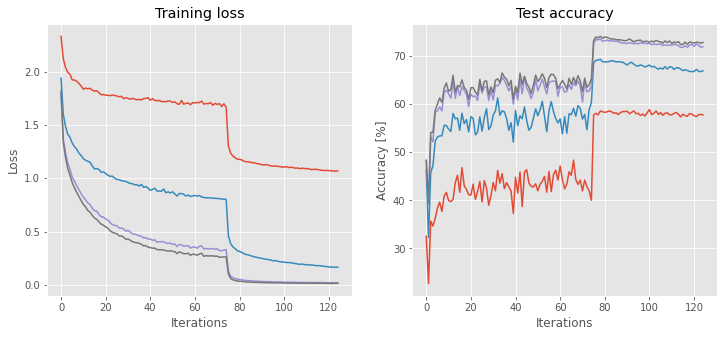

In [41]:
from train_utils import display_loss_plot
plt.style.use("ggplot")
plt.figure(figsize=(12,5))
numpy_losses= np.array(losses)
lose1 = numpy_losses[:,0]
lose2 = numpy_losses[:,1]
lose3 = numpy_losses[:,2]
lose4 = numpy_losses[:,3]
# Plot training loss over epochs
# loss_per_epoch = [np.mean(loss_per_epoch) for loss_per_epoch in running_loss]
plt.subplot(1,2,1)
display_loss_plot(lose1)
display_loss_plot(lose2)
display_loss_plot(lose3)
display_loss_plot(lose4)
# Plot test accuracy over epochs
numpy_acces=np.array(acces)
acc1 = numpy_acces[:,0]
acc2 = numpy_acces[:,1]
acc3 = numpy_acces[:,2]
acc4 = numpy_acces[:,3]
plt.subplot(1,2,2)
display_loss_plot(acc1, title="Test accuracy", ylabel="Accuracy [%]")
display_loss_plot(acc2, title="Test accuracy", ylabel="Accuracy [%]")
display_loss_plot(acc3, title="Test accuracy", ylabel="Accuracy [%]")
display_loss_plot(acc4, title="Test accuracy", ylabel="Accuracy [%]")
plt.show()

# ResNet18 on ImageNet

In [2]:
import torch 
from torch import nn
import torchvision as tv
from torchvision.models import ResNet

In [3]:
from resnet import branchBottleNeck
class Flatten(nn.Module):
    def forward(self,x):
        return torch.flatten(x,1)
    
class FeatureReroute(nn.Module):
    '''
    Split the feature into two parts with the ratio along channel dimension,
    
    '''
    def __init__(self, num_channel, ratio=0.5):
        super().__init__()
        self.ratio = ratio
        self.num_channel = num_channel
        self.feature_num1 = int(num_channel*ratio)
        self.feature_num2 = num_channel - self.feature_num1
        
    def forward(self,x):
        tmp1, tmp2 = torch.split(x,[self.feature_num1,self.feature_num2],dim=1)
        x1 = torch.cat([tmp1,tmp2.detach()],1)
        x2 = torch.cat([tmp1.detach(),tmp2],1)

        return x1,x2   
    
class ResNetFSS(ResNet):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)
        num_classes = 1000
        self.fsslayer1=FeatureReroute(64)
        self.classifier1 = nn.Sequential(
                branchBottleNeck(64,512,kernel_size=8),
#                 nn.Conv2d(64,512 * block.expansion,1),
                nn.AdaptiveAvgPool2d((1, 1)),
                Flatten(),
                nn.Linear(512, num_classes)
            )
        self.fsslayer2=FeatureReroute(128)
        self.classifier2 = nn.Sequential(
                branchBottleNeck(128,512,kernel_size=4),
#                 nn.Conv2d(64,512 * block.expansion,1),
                nn.AdaptiveAvgPool2d((1, 1)),
                Flatten(),
                nn.Linear(512, num_classes)
            )
        self.fsslayer3=FeatureReroute(256)
        self.classifier3 = nn.Sequential(
                branchBottleNeck(256,512,kernel_size=2),
#                 nn.Conv2d(64,512 * block.expansion,1),
                nn.AdaptiveAvgPool2d((1, 1)),
                Flatten(),
                nn.Linear(512, num_classes)
            )
    def forward(self,x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x,y1 = self.fsslayer1(x)
        c1 = self.classifier1(y1)
        x = self.layer2(x)
        x,y2 = self.fsslayer2(x)
        c2 = self.classifier2(y2)
        x = self.layer3(x)
        x,y3 = self.fsslayer3(x)
        c3 = self.classifier3(y3)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        c4 = self.fc(x)

        return c1,c2,c3,c4
    
class ResNetSDN(ResNetFSS):   
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)
        num_classes = 1000
        self.middlefea1=nn.Sequential(
                branchBottleNeck(64,512,kernel_size=8),
#                 nn.Conv2d(64,512 * block.expansion,1),
                nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier1 = nn.Sequential(
                Flatten(),
                nn.Linear(512, num_classes)
            )
        self.middlefea2=nn.Sequential(
                branchBottleNeck(128,512,kernel_size=4),
#                 nn.Conv2d(64,512 * block.expansion,1),
                nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier2 = nn.Sequential(
                Flatten(),
                nn.Linear(512, num_classes)
            )
        self.middlefea3=nn.Sequential(
                branchBottleNeck(256,512,kernel_size=2),
#                 nn.Conv2d(64,512 * block.expansion,1),
                nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier3 = nn.Sequential(
                Flatten(),
                nn.Linear(512, num_classes)
            )
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        y1 = self.middlefea1(x)
        c1 = self.classifier1(y1)
        x = self.layer2(x)
        y2 = self.middlefea2(x)
        c2 = self.classifier2(y2)
        x = self.layer3(x)
        y3 = self.middlefea3(x)
        c3 = self.classifier3(y3)
        x = self.layer4(x)

        y4 = self.avgpool(x)
        x = torch.flatten(y4, 1)
        c4 = self.fc(x)

        return c4,c1,c2,c3,y4,y1,y2,y3
    
from torchvision.models.resnet import BasicBlock
resnetfss18 = ResNetFSS(BasicBlock,[2,2,2,2])
resnetsdn18 = ResNetSDN(BasicBlock,[2,2,2,2])

In [4]:
import sys
sys.path.append("/workspace/packages/autoqnn")
import autoqnn

In [5]:
autoqnn.utils.get_attainable_FLOPS(resnetfss18,(2,3,224,224),"2080ti",model_name="resnetfss18")
autoqnn.utils.get_attainable_FLOPS(resnetsdn18,(2,3,224,224),"2080ti",model_name="resnetsdn18")

Flops, Params and Mems of resnetfss18 is [1.96GFLOPs,15.10M, 96.80M]
resnetfss18 is Compute-bound model on 2080ti
Flops, Params and Mems of resnetsdn18 is [1.96GFLOPs,15.10M, 96.81M]
resnetsdn18 is Compute-bound model on 2080ti


11750000000000.0

In [6]:
# ImageNet
from autoqnn.datasets import imagenet
train_loader, test_loader=imagenet.get_dataset(data_path="/workspace/dataset/imagenet/",
                                              batch_size=128,workers=8,parse_type="torch")

### ResNetSDN18 training

In [15]:
# training progress
# Training hyper-parameters
import torch
from torch import nn
import time
model = resnetsdn18.cuda()
best_prec1 = 0
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1, 
                            momentum=0.9, 
                            weight_decay = 1e-4)
def warm_multi_step(epoch):
    if (epoch < 1):
        return 0.1
    elif (1<=epoch<75):
        return 1
    elif 75 <= epoch < 130:
        return 0.1
    elif 130 <= epoch < 180:
        return 0.01
    elif epoch >=180:
        return 0.001
    else:
        return 1

lr_schedule = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                warm_multi_step,verbose=True)
# lr_schedule = torch.optim.lr_scheduler.MultiStepLR(optimizer,[75,90,95])
num_epoch=1
start_epoch = 0
temperature = 3
alpha = 0.1
beta = 1e-6

Adjusting learning rate of group 0 to 1.0000e-02.


In [16]:
from train_utils import AverageMeter
from train_utils import sdn_validate, sdn_train
from tqdm import tqdm

losses = []
acces = []
for epoch in range(start_epoch, num_epoch):
    # training
    batch_time,data_time,l1,l2,l3,l4 = sdn_train(resnetsdn18, train_loader,
                                             optimizer, criterion, temperature)
    lr_schedule.step()
    # Validation
    t1,t2,t3,t4 = sdn_validate(resnetsdn18,test_loader)
    
    losses.append([l1,l2,l3,l4])
    acces.append([t1,t2,t3,t4])
    start_epoch = epoch
    
    print("Epoch %d/%d: lr=%.4f, "\
          "mean batch time = %.2fs, mean data loading time = %.2f, "\
          "Training loss = %.4f,%.4f,%.4f,%.4f, "\
          "Test accuracy = %.2f%%,%.2f%%,%.2f%%,%.2f%%," % (
        epoch+1,num_epoch, optimizer.state_dict()['param_groups'][0]['lr'], 
        batch_time,data_time,
        l1,l2,l3,l4, 
        t1,t2,t3,t4))

  0%|          | 0/391 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


  0%|          | 1/391 [00:04<30:35,  4.71s/it]


RuntimeError: CUDA out of memory. Tried to allocate 98.00 MiB (GPU 0; 10.76 GiB total capacity; 9.49 GiB already allocated; 51.44 MiB free; 9.71 GiB reserved in total by PyTorch)

### ResNetFSS18 training

In [7]:
# training progress
# Training hyper-parameters
import torch
from torch import nn
import time
model = resnetfss18.cuda()
best_prec1 = 0
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1, 
                            momentum=0.9, 
                            weight_decay = 1e-4)
def warm_multi_step(epoch):
    if (epoch < 1):
        return 0.1
    elif (1<=epoch<75):
        return 1
    elif 75 <= epoch < 130:
        return 0.1
    elif 130 <= epoch < 180:
        return 0.01
    elif epoch >=180:
        return 0.001
    else:
        return 1

lr_schedule = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                warm_multi_step,verbose=True)
# lr_schedule = torch.optim.lr_scheduler.MultiStepLR(optimizer,[75,90,95])
num_epoch=1
start_epoch = 0
temperature = 3
alpha = 0.1
beta = 1e-6

Adjusting learning rate of group 0 to 1.0000e-02.


In [9]:
from train_utils import AverageMeter
from train_utils import dsn_validate, dsn_train
from tqdm import tqdm

losses = []
acces = []
for epoch in range(start_epoch, num_epoch):
    # training
    batch_time,data_time,l1,l2,l3,l4 = dsn_train(model, train_loader,
                                             optimizer, criterion, temperature)
    lr_schedule.step()
    # Validation
    t1,t2,t3,t4 = dsn_validate(model,test_loader)
    
    losses.append([l1,l2,l3,l4])
    acces.append([t1,t2,t3,t4])
    start_epoch = epoch
    
    print("Epoch %d/%d: lr=%.4f, "\
          "mean batch time = %.2fs, mean data loading time = %.2f, "\
          "Training loss = %.4f,%.4f,%.4f,%.4f, "\
          "Test accuracy = %.2f%%,%.2f%%,%.2f%%,%.2f%%," % (
        epoch+1,num_epoch, optimizer.state_dict()['param_groups'][0]['lr'], 
        batch_time,data_time,
        l1,l2,l3,l4, 
        t1,t2,t3,t4))

  0%|          | 0/391 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


100%|██████████| 391/391 [01:19<00:00,  4.91it/s]

Epoch 1/1: lr=0.1000, mean batch time = 0.36s, mean data loading time = 0.23, Training loss = 5.4166,5.2725,5.1541,5.1548, Test accuracy = 11.40%,13.79%,15.93%,16.61%,


In [17]:
torch.__version__

'1.7.1'